https://www.federalreserve.gov/pubs/feds/2006/200628/200628pap.pdf

# Loading the data

data is from https://www.federalreserve.gov/econres/feds/the-us-treasury-yield-curve-1961-to-the-present.htm

## Loading full dataset

In [1]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
import pandas as pd 
from pandas import Series, DataFrame 
from matplotlib import pyplot as plt
import numpy as np

SavePlots = False

In [3]:
import pandas as pd

# Skip the first 9 rows
data = pd.read_csv('../Final-Project-AppML/feds200628.csv', skiprows=9)

# Show the first 5 rows of the resulting dataframe
data.head(5)


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
0,1961-06-14,3.917606,-1.277955,-1.949397,0.0,3.8067,3.9562,NaN,3.5492,3.8825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339218,-999.99
1,1961-06-15,3.978498,-1.257404,-2.247617,0.0,3.8694,4.0183,NaN,3.5997,3.9460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325775,-999.99
2,1961-06-16,3.984350,-1.429538,-1.885024,0.0,3.8634,4.0242,NaN,3.5957,3.9448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348817,-999.99
3,1961-06-19,4.004379,-0.723311,-3.310743,0.0,3.9196,4.0447,NaN,3.6447,3.9842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282087,-999.99
4,1961-06-20,3.985789,-0.900432,-2.844809,0.0,3.8732,4.0257,NaN,3.5845,3.9552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310316,-999.99


## Removing non-essential rows and columns

In [5]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter rows where Date is on or after 1985-01-02
data1 = data[data['Date'] >= '1985-01-02']

# Optional: check the result
data1.head()


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
6145,1985-01-02,11.833172,-4.078431,-617.564405,620.832652,11.1608,12.5602,12.3404,10.1920,11.3976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.183248,2.183435
6146,1985-01-03,11.967238,-4.169920,-617.777654,620.619446,11.1536,12.4338,12.3620,10.2197,11.3545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.181257,2.179797
6147,1985-01-04,12.049434,-4.354115,-617.725058,620.671900,11.2057,12.4703,12.4150,10.2513,11.4123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.173992,2.171873
6148,1985-01-07,11.960591,-4.299825,-617.803915,620.593354,11.1201,12.2761,12.2690,10.1968,11.3032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.159062,2.156195
6149,1985-01-08,11.861243,-4.192519,-617.794508,620.602735,11.0820,12.2177,12.1834,10.1686,11.2611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142931,2.140394


In [6]:
# List of columns to keep always
cols_to_keep = ['Date', 'BETA0', 'BETA1', 'BETA2']

# Select columns that start with 'SVENY'
sveny_cols = [col for col in data.columns if col.startswith('SVENY')]

# Combine all columns to keep
all_keep_cols = cols_to_keep + sveny_cols

# Filter the dataframe to keep only these columns
data2 = data1[all_keep_cols]

# Check the result
data2.head()

# Drop SVENY21 to SVENY30 from data2
columns_to_drop = [f'SVENY{i}' for i in range(21, 31)]
data2 = data2.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
data2.shape

(10528, 24)

In [ ]:
data2.head()

,Date,BETA0,BETA1,BETA2,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,...,SVENY11,SVENY12,SVENY13,SVENY14,SVENY15,SVENY16,SVENY17,SVENY18,SVENY19,SVENY20
6145,1985-01-02,11.833172,-4.078431,-617.564405,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,...,11.6606,11.6812,11.6969,11.7093,11.7193,11.7275,11.7344,11.7404,11.7456,11.7501
6146,1985-01-03,11.967238,-4.169920,-617.777654,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,...,11.6216,11.6510,11.6756,11.6964,11.7144,11.7301,11.7440,11.7563,11.7673,11.7772
6147,1985-01-04,12.049434,-4.354115,-617.725058,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,...,11.6588,11.6903,11.7170,11.7399,11.7599,11.7775,11.7932,11.8071,11.8197,11.8310
6148,1985-01-07,11.960591,-4.299825,-617.803915,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,...,11.5188,11.5522,11.5811,11.6063,11.6285,11.6483,11.6659,11.6818,11.6961,11.7091
6149,1985-01-08,11.861243,-4.192519,-617.794508,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,...,11.4608,11.4917,11.5183,11.5413,11.5616,11.5795,11.5956,11.6099,11.6229,11.6346


# Data overview

## Plotting variables 

In [ ]:
plot_data =data2

# Rename SVENY columns by stripping the prefix
plot_data.rename(columns=lambda col: col[5:] if col.startswith('SVENY') else col, inplace=True)

# Optional: convert new column names from strings like '01' to integers
plot_data.rename(columns=lambda col: str(int(col)) if col.isdigit() else col, inplace=True)

# Check the new column names
print(plot_data.columns)



Index(['Date', 'BETA0', 'BETA1', 'BETA2', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt

# Histogram plotting function, you can adjust the bins

def plot_histogram(column_name, bins=30):
    if column_name not in plot_data.columns:
        print(f"Column '{column_name}' not found in data.")
        return

    plt.figure(figsize=(6, 4))
    plt.hist(plot_data[column_name].dropna(), bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


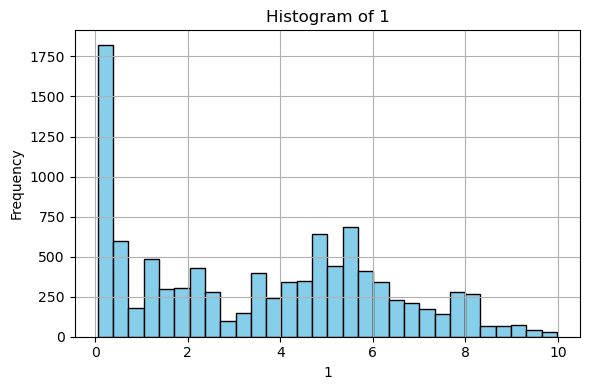

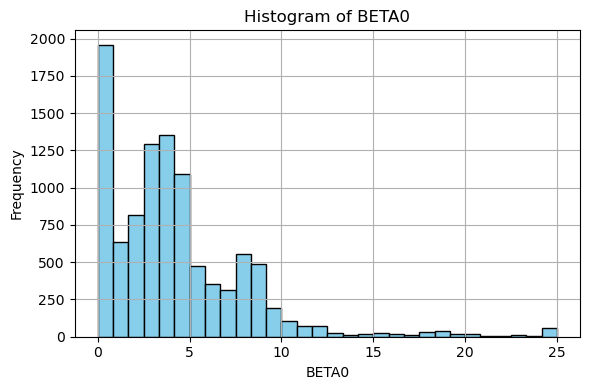

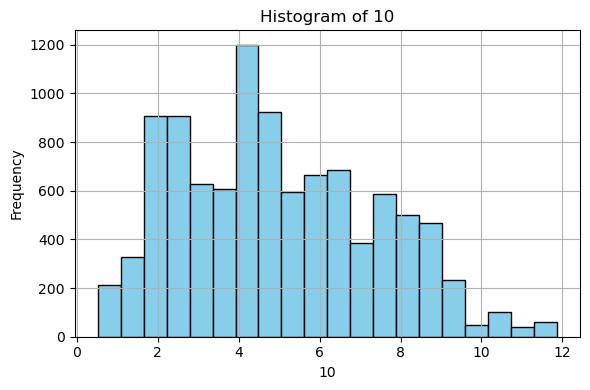

In [ ]:
plot_histogram('1')         # Histogram for maturity 1
plot_histogram('BETA0')     # Histogram for BETA0
plot_histogram('10', bins=20)  # Histogram for maturity 10 with 20 bins

## Plotting yield curve for one maturity

In [ ]:
plot_data.head(5)

,Date,BETA0,BETA1,BETA2,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,19,20
6145,1985-01-02,11.833172,-4.078431,-617.564405,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,...,11.6606,11.6812,11.6969,11.7093,11.7193,11.7275,11.7344,11.7404,11.7456,11.7501
6146,1985-01-03,11.967238,-4.169920,-617.777654,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,...,11.6216,11.6510,11.6756,11.6964,11.7144,11.7301,11.7440,11.7563,11.7673,11.7772
6147,1985-01-04,12.049434,-4.354115,-617.725058,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,...,11.6588,11.6903,11.7170,11.7399,11.7599,11.7775,11.7932,11.8071,11.8197,11.8310
6148,1985-01-07,11.960591,-4.299825,-617.803915,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,...,11.5188,11.5522,11.5811,11.6063,11.6285,11.6483,11.6659,11.6818,11.6961,11.7091
6149,1985-01-08,11.861243,-4.192519,-617.794508,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,...,11.4608,11.4917,11.5183,11.5413,11.5616,11.5795,11.5956,11.6099,11.6229,11.6346


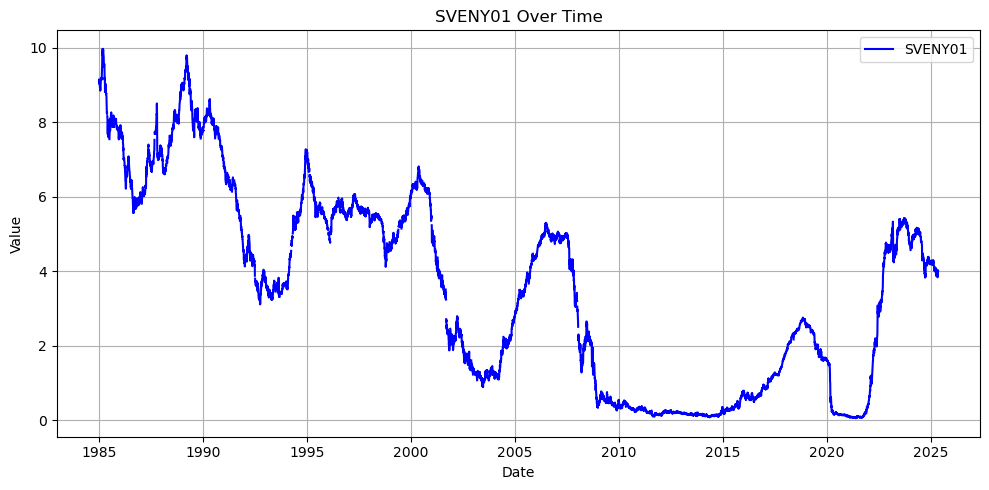

In [ ]:
# Plot column '1' against Date
plt.figure(figsize=(10, 5))
plt.plot(plot_data['Date'], plot_data['1'], label='SVENY01', color='blue')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SVENY01 Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## 3d plot of yield curve

/var/folders/lj/7sv2y2pj44184gp5gwhj9d5w0000gn/T/ipykernel_41547/2336497114.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


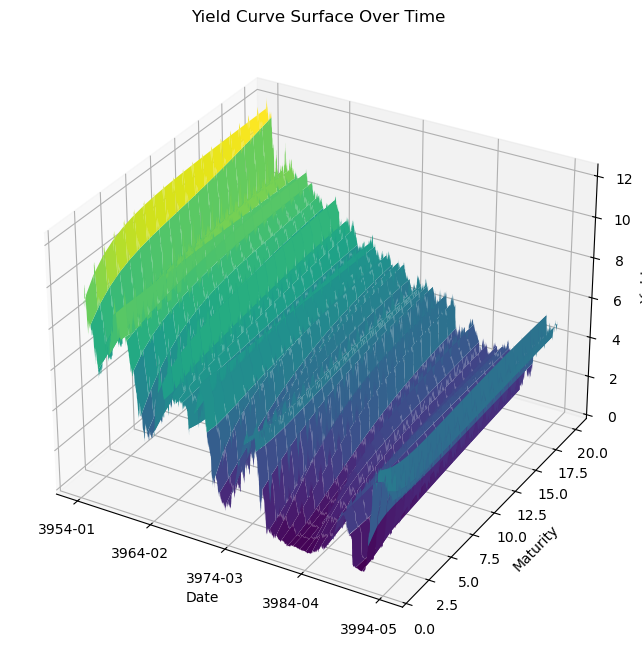

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Ensure Date is in numeric format for plotting (convert to ordinal)
X = plot_data['Date'].map(pd.Timestamp.toordinal).values  # shape: (n_dates,)

# Get the maturity columns, assume they are all digit strings
maturity_cols = sorted([col for col in plot_data.columns if col.isdigit()], key=lambda x: int(x))
Y = np.array([int(m) for m in maturity_cols])  # shape: (n_maturities,)

# Get Z values (yield values): shape should be (n_dates, n_maturities)
Z = plot_data[maturity_cols].values  # shape: (n_dates, n_maturities)

# Create meshgrid for Date (X) and Maturity (Y)
X_mesh, Y_mesh = np.meshgrid(X, Y, indexing='ij')  # X: dates, Y: maturities

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X_mesh, Y_mesh, Z, cmap='viridis')

# Format axes
ax.set_xlabel('Date')
ax.set_ylabel('Maturity')
ax.set_zlabel('Yield')
ax.set_title('Yield Curve Surface Over Time')

# Optional: Format date ticks
from matplotlib.dates import num2date
ax.set_xticks(np.linspace(X.min(), X.max(), 5))
ax.set_xticklabels([num2date(t).strftime('%Y-%m') for t in np.linspace(X.min(), X.max(), 5)])

plt.tight_layout()
plt.show()

## Preliminary attempt at encoding

Note: Removing all NaN's and including beta's in the encoder

I.e.: this is only to compare and detect weaknessses in the model preliminary to actual fitting

In [ ]:
# first guess coder
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare your data
data_clean = data2.dropna().drop(columns=["Date"])  # Drop NaNs and Date
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clean)

# Step 2: Define autoencoder architecture
input_dim = X_scaled.shape[1]

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)  # Bottleneck

# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Step 3: Train the autoencoder
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - loss: 0.6427 - val_loss: 0.0965
Epoch 2/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.1440 - val_loss: 0.0582
Epoch 3/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.0548 - val_loss: 0.0356
Epoch 4/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.0414 - val_loss: 0.0283
Epoch 5/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.0373 - val_loss: 0.0247
Epoch 6/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 0.0138 - val_loss: 0.0218
Epoch 7/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 0.0087 - val_loss: 0.0209
Epoch 8/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.0085 - val_loss: 0.0182
Epoch 9/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.0079 - val_loss: 0.0167
Epoch 10/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.0075 - val_loss: 0.0135
Epoch 11/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.0069 - val_loss: 0.0131
Epoch 12/50
284/284 ━━━━━━━━━━

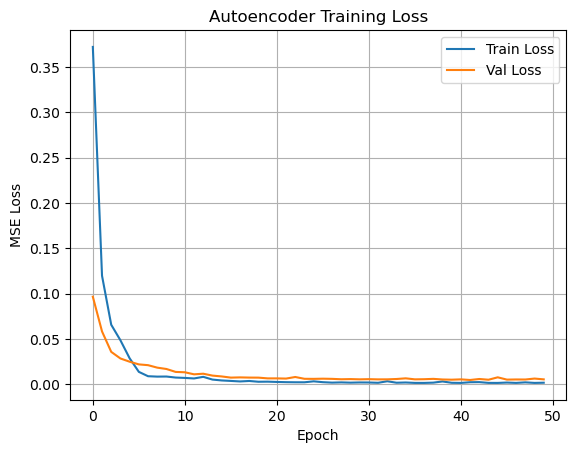

In [ ]:
#Visualizing training loss
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Attempt to reconstruct

X_reconstructed = autoencoder.predict(X_scaled)

# Compute reconstruction error
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2, axis=1)

# Optional: Flag high-error rows as anomalies
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold


315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Inverse transform to original scale
X_reconstructed_original = scaler.inverse_transform(X_reconstructed)

# Step 2: Recreate DataFrame from reconstruction
# Use the same columns that were input to the autoencoder
reconstructed_df = pd.DataFrame(X_reconstructed_original, columns=X.columns)

# Step 3: Extract maturity columns (assumes SVENY01 to SVENY30)
maturity_cols = [col for col in reconstructed_df.columns if col.startswith("SVENY")]
maturity_cols_sorted = sorted(maturity_cols, key=lambda x: int(x.replace("SVENY", "")))

# Step 4: Create meshgrid for plotting
X_time = np.arange(len(reconstructed_df))  # Use row index as time
Y_maturities = np.array([int(col.replace("SVENY", "")) for col in maturity_cols_sorted])
Z_yields = reconstructed_df[maturity_cols_sorted].values

X_mesh, Y_mesh = np.meshgrid(X_time, Y_maturities, indexing='ij')

# Step 5: Plot 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X_mesh, Y_mesh, Z_yields, cmap='viridis')

ax.set_xlabel('Time Index')
ax.set_ylabel('Maturity')
ax.set_zlabel('Reconstructed Yield')
ax.set_title('Reconstructed Yield Curve Surface')

plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# PCA constructing Betas

## How many components

In [ ]:
data_pca = data2.drop(columns=['BETA0', 'BETA1', 'BETA2', 'BETA3'], errors='ignore')

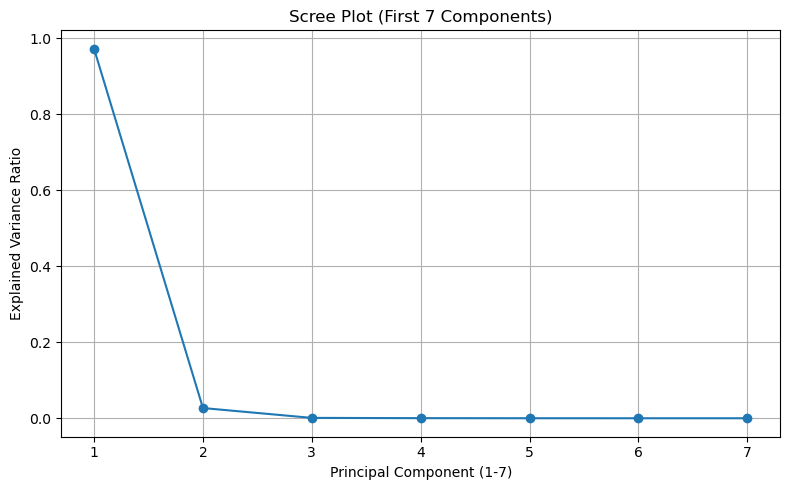

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 1. Select only numeric columns and drop NaNs
X = data_pca.select_dtypes(include=[np.number]).dropna()

# 2. Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# 3. Fit PCA and limit to 7 components
pca = PCA(n_components=7)
pca.fit(X_scaled)

# 4. Explained variance for first 7 components
explained_variance = pca.explained_variance_ratio_

# 5. Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), explained_variance, marker='o', linestyle='-')
plt.xlabel('Principal Component (1-7)')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (First 7 Components)')
plt.grid(True)
plt.tight_layout()
plt.show()



## PCA with 3 components

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Select numeric columns and drop NaNs
X = data_pca.select_dtypes(include='number').dropna()

# 2. Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# 3. Fit PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 4. (Optional) Inspect shape and explained variance
print("Shape of PCA output:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Shape of PCA output: (10073, 3)
Explained variance ratio: [9.71920142e-01 2.68402073e-02 9.48003073e-04]


In [ ]:
# Each row corresponds to a principal component
# Each column corresponds to the original feature
print("PCA Components (loadings):")
print(pca.components_)


PCA Components (loadings):
[[ 0.20781566  0.21520252  0.21987041  0.22287819  0.22477554  0.22589578
   0.22647056  0.22667124  0.22662611  0.22642988  0.22615046  0.22583459
   0.22551269  0.22520293  0.22491455  0.22465046  0.22440924  0.22418668
   0.22397691  0.22377313]
 [ 0.53457947  0.42962807  0.333493    0.24833791  0.17359171  0.10853609
   0.0524047   0.00436546 -0.0364496  -0.07090949 -0.09984518 -0.12402723
  -0.14415052 -0.16083108 -0.17460565 -0.18593744 -0.19522326 -0.20279966
  -0.20895121 -0.21391796]
 [ 0.58122441  0.16220575 -0.08340882 -0.21934016 -0.28284171 -0.29778643
  -0.28070279 -0.24339655 -0.1943536  -0.13962499 -0.0834631  -0.02879025
   0.02244109  0.06900294  0.11017061  0.14559121  0.17516399  0.19897046
   0.21720987  0.23015998]]


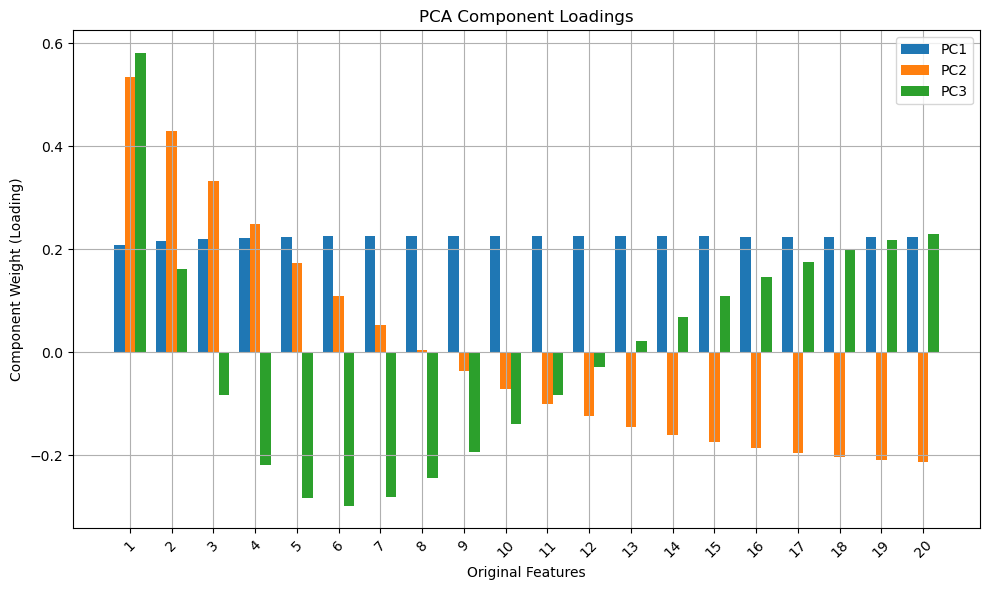

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names
feature_names = data_pca.select_dtypes(include='number').columns

# Create a DataFrame of the PCA components
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3'])

# Plot each component's loadings
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.bar(np.arange(len(feature_names)) + i*0.25, components_df.iloc[i], width=0.25, label=f'PC{i+1}')

# Formatting
plt.xticks(np.arange(len(feature_names)) + 0.25, feature_names, rotation=45)
plt.xlabel('Original Features')
plt.ylabel('Component Weight (Loading)')
plt.title('PCA Component Loadings')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


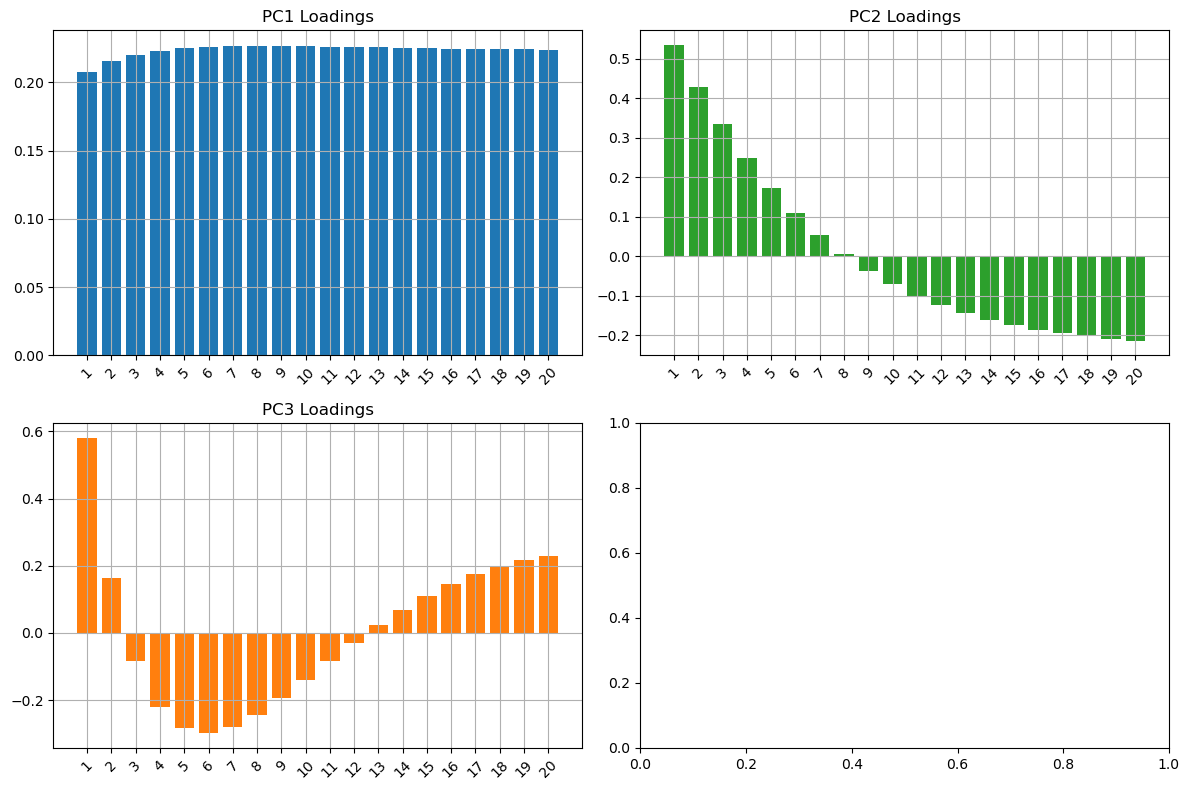

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature names and PCA components as a DataFrame
feature_names = data_pca.select_dtypes(include='number').columns
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3'])

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot PC1 (top left)
axs[0, 0].bar(feature_names, components_df.loc['PC1'], color='tab:blue')
axs[0, 0].set_title('PC1 Loadings')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# Plot PC2 (top right)
axs[0, 1].bar(feature_names, components_df.loc['PC2'], color='tab:green')
axs[0, 1].set_title('PC2 Loadings')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# Plot PC3 (bottom left)
axs[1, 0].bar(feature_names, components_df.loc['PC3'], color='tab:orange')
axs[1, 0].set_title('PC3 Loadings')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

## PCA with 4 components

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Select numeric columns and drop NaNs
X = data_pca.select_dtypes(include='number').dropna()

# 2. Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# 3. Fit PCA with 3 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# 4. (Optional) Inspect shape and explained variance
print("Shape of PCA output:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Shape of PCA output: (10073, 4)
Explained variance ratio: [9.71920142e-01 2.68402073e-02 9.48003073e-04 2.51365424e-04]


In [ ]:
# Each row corresponds to a principal component
# Each column corresponds to the original feature
print("PCA Components (loadings):")
print(pca.components_)


PCA Components (loadings):
[[ 0.20781566  0.21520252  0.21987041  0.22287819  0.22477554  0.22589578
   0.22647056  0.22667124  0.22662611  0.22642988  0.22615046  0.22583459
   0.22551269  0.22520293  0.22491455  0.22465046  0.22440924  0.22418668
   0.22397691  0.22377313]
 [ 0.53457947  0.42962807  0.333493    0.24833791  0.17359171  0.10853609
   0.0524047   0.00436546 -0.0364496  -0.07090949 -0.09984518 -0.12402723
  -0.14415052 -0.16083108 -0.17460565 -0.18593744 -0.19522326 -0.20279966
  -0.20895121 -0.21391796]
 [ 0.58122441  0.16220575 -0.08340882 -0.21934016 -0.28284171 -0.29778643
  -0.28070279 -0.24339655 -0.1943536  -0.13962499 -0.0834631  -0.02879025
   0.02244109  0.06900294  0.11017061  0.14559121  0.17516399  0.19897046
   0.21720987  0.23015998]
 [-0.33847372  0.09971218  0.26652469  0.2714737   0.19343685  0.08254604
  -0.03070241 -0.12877415 -0.20257298 -0.24838    -0.26580128 -0.25640695
  -0.22279283 -0.16803953 -0.09531669 -0.00768995  0.0920016   0.20119539
   0

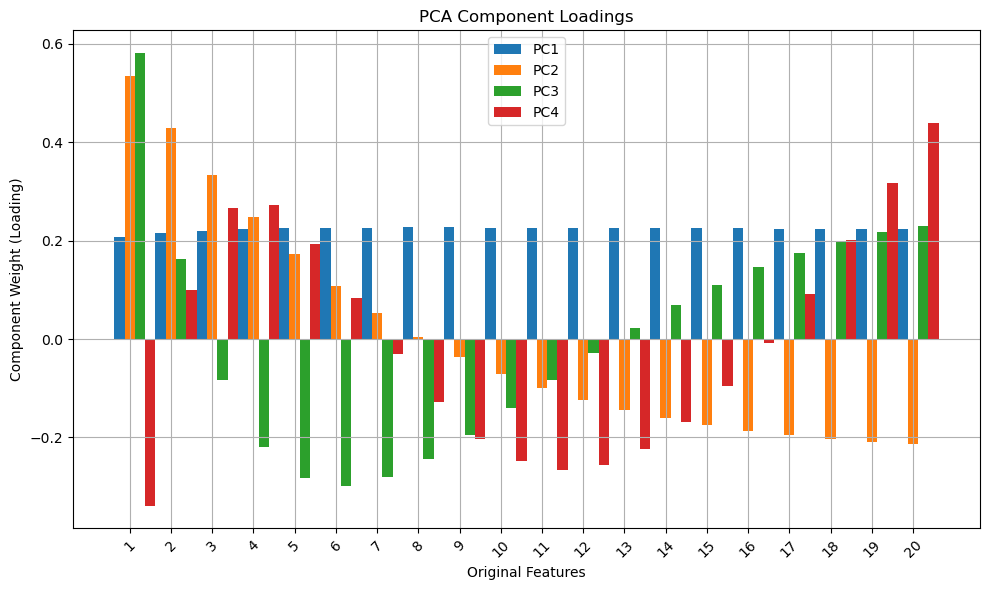

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names
feature_names = data_pca.select_dtypes(include='number').columns

# Create a DataFrame of the PCA components
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3', 'PC4'])

# Plot each component's loadings
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.bar(np.arange(len(feature_names)) + i*0.25, components_df.iloc[i], width=0.25, label=f'PC{i+1}')

# Formatting
plt.xticks(np.arange(len(feature_names)) + 0.25, feature_names, rotation=45)
plt.xlabel('Original Features')
plt.ylabel('Component Weight (Loading)')
plt.title('PCA Component Loadings')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


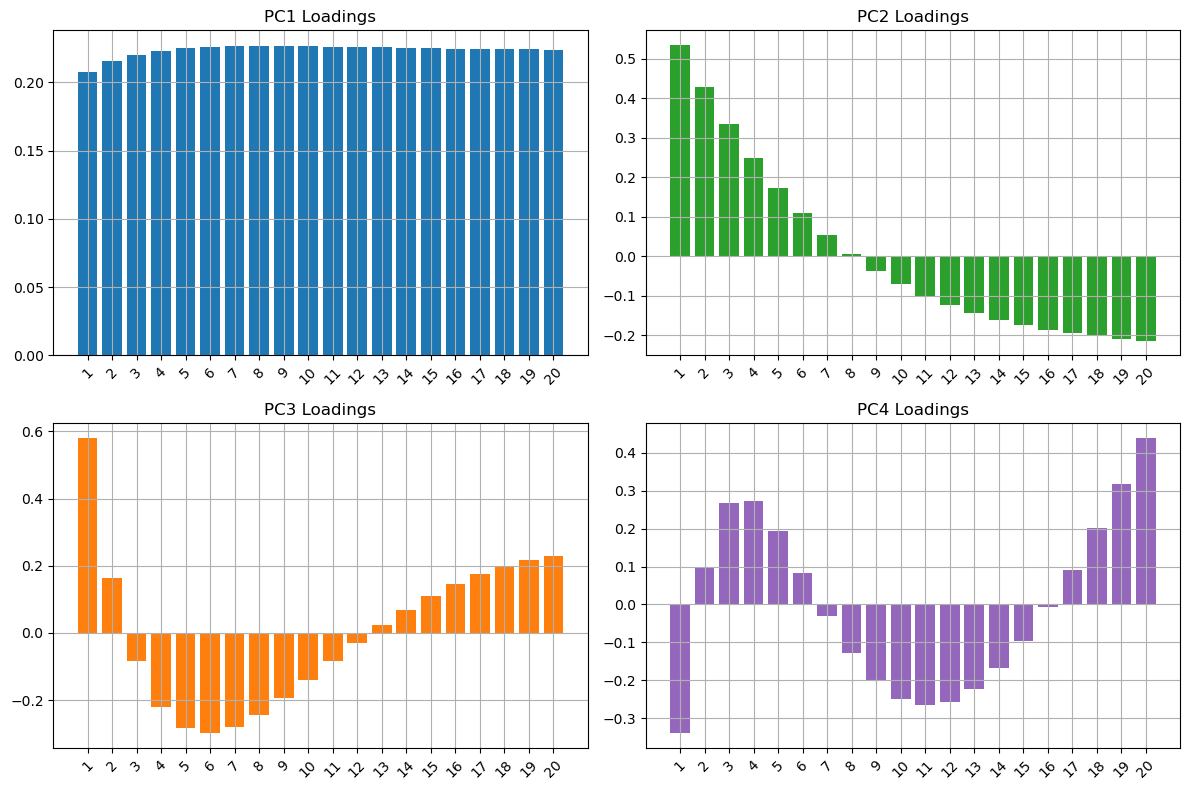

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature names and PCA components as a DataFrame
feature_names = data_pca.select_dtypes(include='number').columns
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3', 'PC4'])

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot PC1 (top left)
axs[0, 0].bar(feature_names, components_df.loc['PC1'], color='tab:blue')
axs[0, 0].set_title('PC1 Loadings')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# Plot PC2 (top right)
axs[0, 1].bar(feature_names, components_df.loc['PC2'], color='tab:green')
axs[0, 1].set_title('PC2 Loadings')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# Plot PC3 (bottom left)
axs[1, 0].bar(feature_names, components_df.loc['PC3'], color='tab:orange')
axs[1, 0].set_title('PC3 Loadings')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# Plot PC4 (bottom left)
axs[1, 1].bar(feature_names, components_df.loc['PC4'], color='tab:purple')
axs[1, 1].set_title('PC4 Loadings')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Remove columns that start with "BETA"
data_coder = data2.loc[:, ~data2.columns.str.startswith('BETA')]

data_coder.head()


,Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY11,SVENY12,SVENY13,SVENY14,SVENY15,SVENY16,SVENY17,SVENY18,SVENY19,SVENY20
6145,1985-01-02,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,11.4652,11.5418,11.5951,...,11.6606,11.6812,11.6969,11.7093,11.7193,11.7275,11.7344,11.7404,11.7456,11.7501
6146,1985-01-03,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,11.4017,11.4809,11.5400,...,11.6216,11.6510,11.6756,11.6964,11.7144,11.7301,11.7440,11.7563,11.7673,11.7772
6147,1985-01-04,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,11.4336,11.5134,11.5736,...,11.6588,11.6903,11.7170,11.7399,11.7599,11.7775,11.7932,11.8071,11.8197,11.8310
6148,1985-01-07,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,11.2961,11.3727,11.4319,...,11.5188,11.5522,11.5811,11.6063,11.6285,11.6483,11.6659,11.6818,11.6961,11.7091
6149,1985-01-08,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,11.2496,11.3231,11.3794,...,11.4608,11.4917,11.5183,11.5413,11.5616,11.5795,11.5956,11.6099,11.6229,11.6346


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 2: Separate 'Date' column
dates = data_coder['Date']
features = data_coder.drop(columns='Date')

# Step 3: Normalize using MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Step 4: Create normalized DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)
normalized_df['Date'] = dates.values

# Step 5: Reorder columns to have 'Date' first
normalized_df = normalized_df[['Date'] + [col for col in normalized_df.columns if col != 'Date']]

# Step 6: Preview
normalized_df.head()


,Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY11,SVENY12,SVENY13,SVENY14,SVENY15,SVENY16,SVENY17,SVENY18,SVENY19,SVENY20
0,1985-01-02,0.912519,0.937690,0.950695,0.959074,0.965036,0.969597,0.973194,0.975994,0.978064,...,0.980216,0.980382,0.979993,0.979143,0.976519,0.973326,0.969787,0.965592,0.960325,0.949114
1,1985-01-03,0.917104,0.939492,0.949647,0.955824,0.960371,0.964212,0.967639,0.970658,0.973223,...,0.976767,0.977702,0.978097,0.977992,0.976082,0.973558,0.970643,0.967007,0.962251,0.951498
2,1985-01-04,0.914968,0.940839,0.952180,0.958664,0.963214,0.967014,0.970429,0.973506,0.976175,...,0.980057,0.981189,0.981781,0.981874,0.980144,0.977786,0.975028,0.971527,0.966901,0.956229
3,1985-01-07,0.911118,0.935168,0.944509,0.949305,0.952601,0.955534,0.958400,0.961179,0.963727,...,0.967676,0.968935,0.969686,0.969951,0.968413,0.966260,0.963683,0.960378,0.955933,0.945509
4,1985-01-08,0.909817,0.932834,0.941630,0.946073,0.949080,0.951733,0.954332,0.956833,0.959114,...,0.962546,0.963567,0.964097,0.964150,0.962440,0.960122,0.957417,0.953980,0.949437,0.938957


# S&P 500 

## Data loading

In [ ]:
data2.head()

,Date,BETA0,BETA1,BETA2,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,19,20
6145,1985-01-02,11.833172,-4.078431,-617.564405,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,...,11.6606,11.6812,11.6969,11.7093,11.7193,11.7275,11.7344,11.7404,11.7456,11.7501
6146,1985-01-03,11.967238,-4.169920,-617.777654,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,...,11.6216,11.6510,11.6756,11.6964,11.7144,11.7301,11.7440,11.7563,11.7673,11.7772
6147,1985-01-04,12.049434,-4.354115,-617.725058,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,...,11.6588,11.6903,11.7170,11.7399,11.7599,11.7775,11.7932,11.8071,11.8197,11.8310
6148,1985-01-07,11.960591,-4.299825,-617.803915,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,...,11.5188,11.5522,11.5811,11.6063,11.6285,11.6483,11.6659,11.6818,11.6961,11.7091
6149,1985-01-08,11.861243,-4.192519,-617.794508,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,...,11.4608,11.4917,11.5183,11.5413,11.5616,11.5795,11.5956,11.6099,11.6229,11.6346


In [ ]:
import pandas as pd

# Skip the first 9 rows
SP_500 = pd.read_csv('../Final-Project-AppML/S&P500_data.csv')

SP_500['Date'] = pd.to_datetime(SP_500['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')

# Show the first 5 rows of the resulting dataframe
SP_500.head(5)



,Date,Close/Last,Open,High,Low
0,2025-05-20,5940.46,5944.66,5953.06,5909.26
1,2025-05-19,5963.60,5902.88,5968.61,5895.69
2,2025-05-16,5958.38,5929.09,5958.62,5907.36
3,2025-05-15,5916.93,5869.82,5924.21,5865.16
4,2025-05-14,5892.58,5896.74,5906.55,5872.11


In [7]:
import pandas as pd

# Skip the first two rows, but manually set row 2 (i.e. 0-based row index 2) as header
SP_500_historic = pd.read_csv('../Final-Project-AppML/SP_historic.csv', skiprows=2, header=0)

# Now 'Date' should be in ISO format already, so you can parse it without specifying a format
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])

# If you want it as 'YYYY-MM-DD' string format
SP_500_historic['Date'] = SP_500_historic['Date'].dt.strftime('%Y-%m-%d')

# Preview
SP_500_historic.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

SP_500_historic.head(5)


,Date,Close,High,Low,Open,Volume
0,1985-01-02,165.369995,167.199997,165.190002,167.199997,67820000
1,1985-01-03,164.570007,166.110001,164.380005,165.369995,88880000
2,1985-01-04,163.679993,164.550003,163.360001,164.550003,77480000
3,1985-01-07,164.240005,164.710007,163.679993,163.679993,86190000
4,1985-01-08,163.990005,164.589996,163.910004,164.240005,92110000


In [8]:
import pandas as pd

# Skip the first 9 rows
fed_interest = pd.read_csv('../Final-Project-AppML/FED_interest.csv')

# Show the first 5 rows of the resulting dataframe
fed_interest.head(5)

,Date,FEDFUNDS,Notes,Rate Change (bps),Target Rate (%)
0,1991-01-01,6.91,0.0,0,0.0
1,1991-01-02,6.91,0.0,0,0.0
2,1991-01-03,6.91,0.0,0,0.0
3,1991-01-04,6.91,0.0,0,0.0
4,1991-01-05,6.91,0.0,0,0.0


## Plotting data

In [9]:
SP_500_historic

,Date,Close,High,Low,Open,Volume
0,1985-01-02,165.369995,167.199997,165.190002,167.199997,67820000
1,1985-01-03,164.570007,166.110001,164.380005,165.369995,88880000
2,1985-01-04,163.679993,164.550003,163.360001,164.550003,77480000
3,1985-01-07,164.240005,164.710007,163.679993,163.679993,86190000
4,1985-01-08,163.990005,164.589996,163.910004,164.240005,92110000
...,...,...,...,...,...,...
10173,2025-05-19,5963.600098,5968.609863,5895.689941,5902.879883,4144010000
10174,2025-05-20,5940.459961,5953.060059,5909.259766,5944.660156,4416850000
10175,2025-05-21,5844.609863,5938.370117,5830.910156,5910.180176,5254250000
10176,2025-05-22,5842.009766,5878.080078,5825.819824,5841.259766,5157050000


In [10]:
import matplotlib.pyplot as plt

def plot_all_columns_time_series(data, date_col='Date'):
    """
    Plots each column in `data` (excluding the date column) as a time series line plot.

    Parameters:
    - data: pandas DataFrame with a datetime column and numeric columns to plot.
    - date_col: Name of the column containing dates (default: 'Date')
    """
    if date_col not in data.columns:
        print(f"Date column '{date_col}' not found.")
        return

    # Ensure date column is datetime
    data = data.copy()
    data[date_col] = pd.to_datetime(data[date_col])

    # Set date as index
    data = data.set_index(date_col)

    # Plot all columns
    plt.figure(figsize=(12, 6))
    for col in data.columns:
        plt.plot(data.index, data[col], label=col)

    plt.title('Time Series of All Columns')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


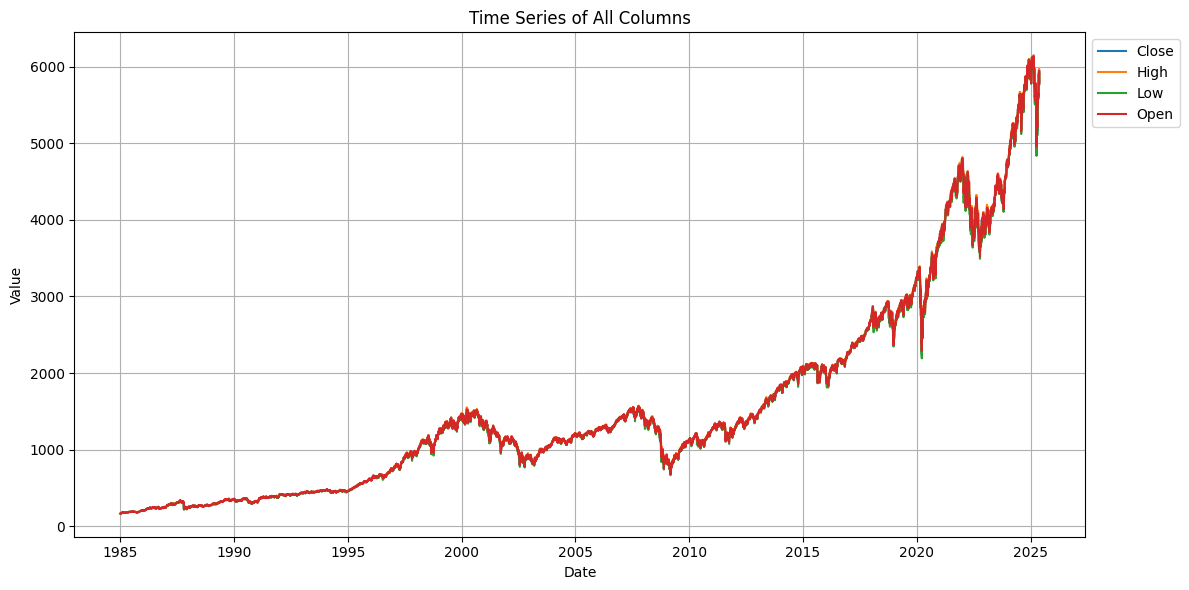

In [11]:
plot_all_columns_time_series(SP_500_historic.drop(columns='Volume'))


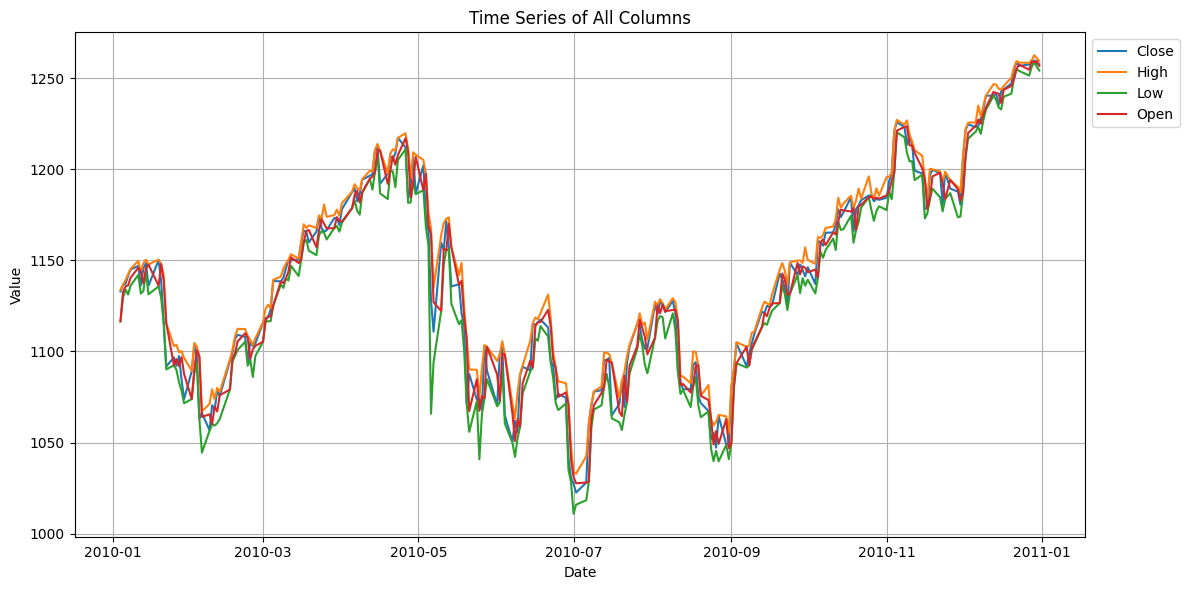

In [12]:
# Ensure 'Date' is in datetime format
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])

# Filter for date range 2010-01-01 to 2015-12-31
subset = SP_500_historic[
    (SP_500_historic['Date'] >= '2010-01-01') &
    (SP_500_historic['Date'] <= '2010-12-31')
]

# Drop 'Volume' and plot
plot_all_columns_time_series(subset.drop(columns='Volume'))


## Merching data

In [44]:
# Ensure both Date columns are datetime
data2['Date'] = pd.to_datetime(data2['Date'])
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])
fed_interest['Date'] = pd.to_datetime(fed_interest['Date'])

# Now do the merge
data_w_SP = pd.merge(data2, SP_500_historic, on='Date', how='left')

data_w_SP = pd.merge(data_w_SP, fed_interest, on='Date', how='left')

data_w_SP.head()


,Date,BETA0,BETA1,BETA2,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,...,SVENY20,Close,High,Low,Open,Volume,FEDFUNDS,Notes,Rate Change (bps),Target Rate (%)
0,1985-01-02,11.833172,-4.078431,-617.564405,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,...,11.7501,165.369995,167.199997,165.190002,167.199997,67820000.0,NaN,NaN,NaN,NaN
1,1985-01-03,11.967238,-4.169920,-617.777654,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,...,11.7772,164.570007,166.110001,164.380005,165.369995,88880000.0,NaN,NaN,NaN,NaN
2,1985-01-04,12.049434,-4.354115,-617.725058,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,...,11.8310,163.679993,164.550003,163.360001,164.550003,77480000.0,NaN,NaN,NaN,NaN
3,1985-01-07,11.960591,-4.299825,-617.803915,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,...,11.7091,164.240005,164.710007,163.679993,163.679993,86190000.0,NaN,NaN,NaN,NaN
4,1985-01-08,11.861243,-4.192519,-617.794508,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,...,11.6346,163.990005,164.589996,163.910004,164.240005,92110000.0,NaN,NaN,NaN,NaN


## Filtering 

In [45]:
# Ensure 'Date' is in datetime format
data_w_SP['Date'] = pd.to_datetime(data_w_SP['Date'])

# Filter by date
data_w_SP = data_w_SP[data_w_SP['Date'] >= '1991-01-09']

# Drop BETA columns and 'Target Rate (%)' column
data_w_SP = data_w_SP.loc[:, ~data_w_SP.columns.str.startswith('BETA')]
data_w_SP = data_w_SP.drop(columns='Target Rate (%)', errors='ignore')
#data_w_SP = data_w_SP.drop(columns='Notes', errors='ignore') # Forlæng
#data_w_SP = data_w_SP.drop(columns='Rate Change (bps)', errors='ignore') #Forlæng

# Convert 'Notes' and 'Rate Change (bps)' to integers, if they exist
for col in ['Notes', 'Rate Change (bps)']:
    if col in data_w_SP.columns:
        data_w_SP[col] = pd.to_numeric(data_w_SP[col], errors='coerce').astype('Int64')  # Nullable integer type

# Show the result
data_w_SP.head()


,Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY19,SVENY20,Close,High,Low,Open,Volume,FEDFUNDS,Notes,Rate Change (bps)
1570,1991-01-09,6.841287,7.133531,7.389677,7.613145,7.807043,7.974199,8.117182,8.238325,8.339752,...,8.617656,8.597437,311.489990,320.730011,310.929993,314.899994,191100000.0,6.91,0,-25
1571,1991-01-10,6.799324,7.089104,7.339749,7.555624,7.740626,7.898230,8.031535,8.143304,8.236000,...,8.495562,8.481158,314.529999,314.769989,311.510010,311.510010,124510000.0,6.91,0,0
1572,1991-01-11,6.773037,7.085764,7.351627,7.576813,7.766714,7.926027,8.058841,8.168714,8.258740,...,8.514983,8.504820,315.230011,315.239990,313.589996,314.529999,123050000.0,6.91,0,0
1573,1991-01-14,6.777678,7.110425,7.385916,7.613962,7.802602,7.958424,8.086828,8.192242,8.278296,...,8.530366,8.520263,312.489990,315.230011,309.350006,315.230011,120830000.0,6.91,0,0
1574,1991-01-15,6.752939,7.099241,7.371627,7.591270,7.772313,7.924163,8.053062,8.163160,8.257241,...,8.577150,8.562148,313.730011,313.730011,311.839996,312.489990,110000000.0,6.91,0,0


In [15]:
data_w_SP.shape

(8959, 27)

In [16]:
num_rows_with_na = data_w_SP.isna().any(axis=1).sum()
print(num_rows_with_na)

400


## Making a XGboost models

### Data loading and filtering

In [110]:
import pandas as pd
data = pd.read_csv('../Final-Project-AppML/feds200628.csv', skiprows=9)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter rows where Date is on or after 1985-01-02
data1 = data[data['Date'] >= '1985-01-02']

# List of columns to keep always
cols_to_keep = ['Date', 'BETA0', 'BETA1', 'BETA2']

# Select columns that start with 'SVENY'
sveny_cols = [col for col in data.columns if col.startswith('SVENY')]

# Combine all columns to keep
all_keep_cols = cols_to_keep + sveny_cols

# Filter the dataframe to keep only these columns
data2 = data1[all_keep_cols]

# Drop SVENY21 to SVENY30 from data2
columns_to_drop = [f'SVENY{i}' for i in range(21, 31)]
data2 = data2.drop(columns=columns_to_drop, errors='ignore')

# Skip the first two rows, but manually set row 2 (i.e. 0-based row index 2) as header
SP_500_historic = pd.read_csv('../Final-Project-AppML/SP_historic.csv', skiprows=2, header=0)

# Now 'Date' should be in ISO format already, so you can parse it without specifying a format
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])

# If you want it as 'YYYY-MM-DD' string format
SP_500_historic['Date'] = SP_500_historic['Date'].dt.strftime('%Y-%m-%d')

# Preview
SP_500_historic.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Skip the first 9 rows
fed_interest = pd.read_csv('../Final-Project-AppML/FED_interest.csv')

# Ensure both Date columns are datetime
data2['Date'] = pd.to_datetime(data2['Date'])
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])
fed_interest['Date'] = pd.to_datetime(fed_interest['Date'])

# Now do the merge
data_w_SP = pd.merge(data2, SP_500_historic, on='Date', how='left')

data_w_SP = pd.merge(data_w_SP, fed_interest, on='Date', how='left')

# Ensure 'Date' is in datetime format
data_w_SP['Date'] = pd.to_datetime(data_w_SP['Date'])

# Filter by date
data_w_SP = data_w_SP[data_w_SP['Date'] >= '1991-01-09']

# Drop BETA columns and 'Target Rate (%)' column
data_w_SP = data_w_SP.loc[:, ~data_w_SP.columns.str.startswith('BETA')]
data_w_SP = data_w_SP.drop(columns='Target Rate (%)', errors='ignore')
#data_w_SP = data_w_SP.drop(columns='Notes', errors='ignore') # Forlæng
#data_w_SP = data_w_SP.drop(columns='Rate Change (bps)', errors='ignore') #Forlæng

# Convert 'Notes' and 'Rate Change (bps)' to integers, if they exist
for col in ['Notes', 'Rate Change (bps)']:
    if col in data_w_SP.columns:
        data_w_SP[col] = pd.to_numeric(data_w_SP[col], errors='coerce').astype('Int64')  # Nullable integer type

In [ ]:
# Drop NaNs
df = data_w_SP.dropna()


In [296]:
import pandas as pd

# Example DataFrame (you can replace this with your actual df)
# df = pd.read_csv('your_input_file.csv')  # Uncomment and modify if you're loading from a file

# Save the DataFrame to a CSV file
file_path = "xgboost_data.csv"
df.to_csv(file_path, index=False)

print(f"Data saved to {file_path}")


Data saved to xgboost_data.csv


### Splitting the data

In [116]:
df.head(5)

,Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY19,SVENY20,Close,High,Low,Open,Volume,FEDFUNDS,Notes,Rate Change (bps)
1570,1991-01-09,6.841287,7.133531,7.389677,7.613145,7.807043,7.974199,8.117182,8.238325,8.339752,...,8.617656,8.597437,311.489990,320.730011,310.929993,314.899994,191100000.0,6.91,0,-25
1571,1991-01-10,6.799324,7.089104,7.339749,7.555624,7.740626,7.898230,8.031535,8.143304,8.236000,...,8.495562,8.481158,314.529999,314.769989,311.510010,311.510010,124510000.0,6.91,0,0
1572,1991-01-11,6.773037,7.085764,7.351627,7.576813,7.766714,7.926027,8.058841,8.168714,8.258740,...,8.514983,8.504820,315.230011,315.239990,313.589996,314.529999,123050000.0,6.91,0,0
1573,1991-01-14,6.777678,7.110425,7.385916,7.613962,7.802602,7.958424,8.086828,8.192242,8.278296,...,8.530366,8.520263,312.489990,315.230011,309.350006,315.230011,120830000.0,6.91,0,0
1574,1991-01-15,6.752939,7.099241,7.371627,7.591270,7.772313,7.924163,8.053062,8.163160,8.257241,...,8.577150,8.562148,313.730011,313.730011,311.839996,312.489990,110000000.0,6.91,0,0


In [117]:
import pandas as pd

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define the cutoff dates
train_end = pd.Timestamp('2018-01-01')
val_end = pd.Timestamp('2025-01-01')

# Create the splits
train_df = df[df['Date'] < train_end]
val_df = df[(df['Date'] >= train_end) & (df['Date'] < val_end)]
test_df = df[df['Date'] >= val_end]

# Optionally check the sizes
print(f"Train set: {len(train_df)} rows")
print(f"Validation set: {len(val_df)} rows")
print(f"Test set: {len(test_df)} rows")


Train set: 6722 rows
Validation set: 1748 rows
Test set: 88 rows


/var/folders/lj/7sv2y2pj44184gp5gwhj9d5w0000gn/T/ipykernel_73517/160201209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


### Predicting with XGboost with time series

#### Baseline model

In [148]:
df.head()

,Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY19,SVENY20,Close,High,Low,Open,Volume,FEDFUNDS,Notes,Rate Change (bps)
1570,1991-01-09,6.841287,7.133531,7.389677,7.613145,7.807043,7.974199,8.117182,8.238325,8.339752,...,8.617656,8.597437,311.489990,320.730011,310.929993,314.899994,191100000.0,6.91,0,-25
1571,1991-01-10,6.799324,7.089104,7.339749,7.555624,7.740626,7.898230,8.031535,8.143304,8.236000,...,8.495562,8.481158,314.529999,314.769989,311.510010,311.510010,124510000.0,6.91,0,0
1572,1991-01-11,6.773037,7.085764,7.351627,7.576813,7.766714,7.926027,8.058841,8.168714,8.258740,...,8.514983,8.504820,315.230011,315.239990,313.589996,314.529999,123050000.0,6.91,0,0
1573,1991-01-14,6.777678,7.110425,7.385916,7.613962,7.802602,7.958424,8.086828,8.192242,8.278296,...,8.530366,8.520263,312.489990,315.230011,309.350006,315.230011,120830000.0,6.91,0,0
1574,1991-01-15,6.752939,7.099241,7.371627,7.591270,7.772313,7.924163,8.053062,8.163160,8.257241,...,8.577150,8.562148,313.730011,313.730011,311.839996,312.489990,110000000.0,6.91,0,0


In [149]:
def add_date_features(df, date_col='Date'):
    df = df.copy()
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['day'] = df[date_col].dt.day
    df['weekday'] = df[date_col].dt.weekday
    df['dayofyear'] = df[date_col].dt.dayofyear
    return df

def prepare_lagged_data_with_date_features(train_df, val_df, target_col, lags=[1, 2, 3], date_col='Date'):
    def create_lags(df, target_col, lags):
        df = df.copy()
        for lag in lags:
            df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)
        return df

    # Add date features
    train_df = add_date_features(train_df, date_col)
    val_df = add_date_features(val_df, date_col)

    # Create lagged features
    train_data = create_lags(train_df, target_col, lags)
    val_data = create_lags(val_df, target_col, lags)

    # Drop rows with NaNs due to lag shifts
    train_data = train_data.dropna()
    val_data = val_data.dropna()

    # Split into X and y
    X_train = train_data.drop(columns=[target_col, date_col])
    y_train = train_data[target_col]

    X_val = val_data.drop(columns=[target_col, date_col])
    y_val = val_data[target_col]

    return X_train, y_train, X_val, y_val


# Example usage:
target = 'Close'
X_train, y_train, X_val, y_val = prepare_lagged_data_with_date_features(train_df, val_df, target)



In [150]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time

start = time.time()

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_val, label=y_val)

params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

y_pred = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(y_val, y_pred)

mean_abs_actual = abs(y_val).mean()
relative_mae = mae / mean_abs_actual

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")


Mean Absolute Error: 1356.3184
Relative MAE: 0.3521
Time used by XGBoost: 129.3 ms


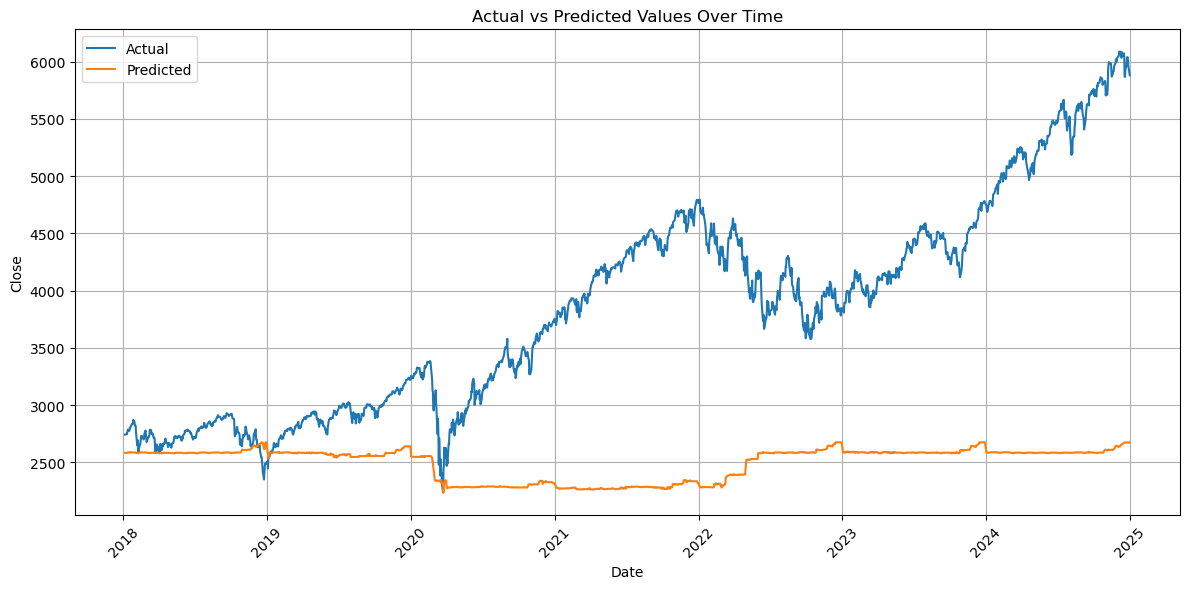

In [151]:
import matplotlib.pyplot as plt
# Align val_df with y_val's index
dates = val_df.loc[y_val.index, 'Date']

plt.figure(figsize=(12, 6))
plt.plot(dates, y_val, label='Actual')
plt.plot(dates, y_pred, label='Predicted')
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Feature importance

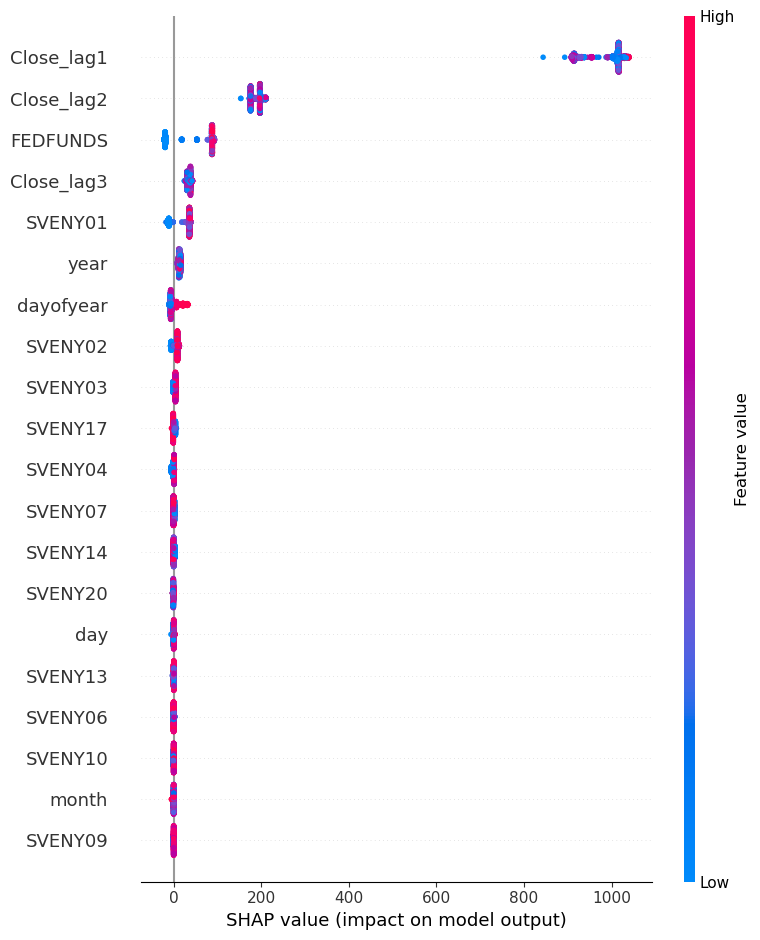

In [152]:
import shap

# Create a SHAP explainer for your XGBoost model
explainer = shap.Explainer(xgb_model)

# Calculate SHAP values for your test set
shap_values = explainer(X_val)

# Summary plot (shows feature importance and effect)
shap.summary_plot(shap_values, X_val)


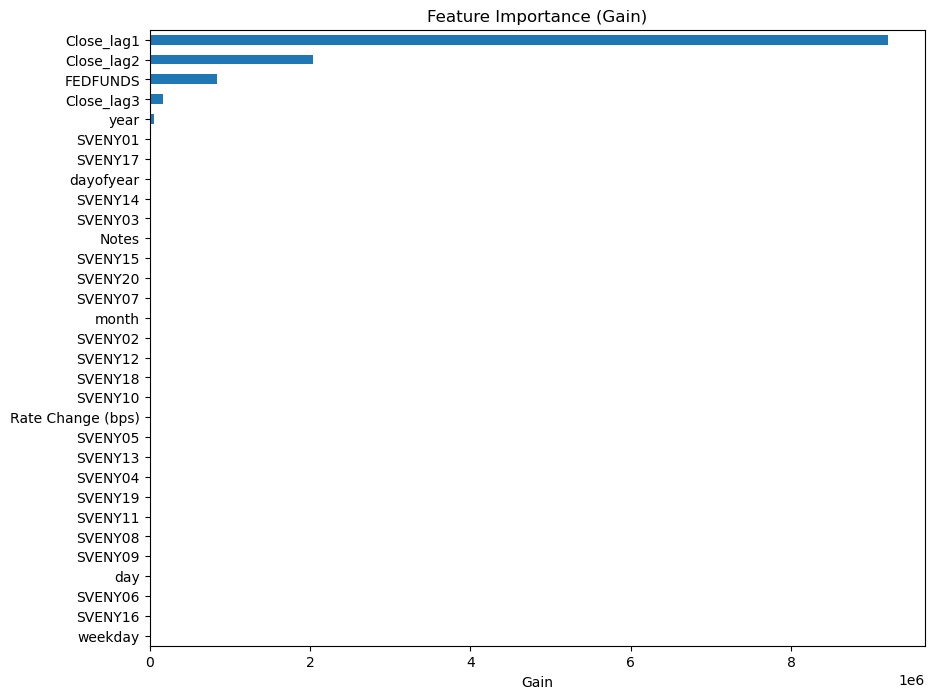

In [153]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Get feature importance scores by 'gain'
importance = xgb_model.get_score(importance_type='gain')

# Convert to pandas Series for easier plotting and sorting
import pandas as pd
importance_series = pd.Series(importance).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
importance_series.plot(kind='barh')
plt.xlabel('Gain')
plt.title('Feature Importance (Gain)')
plt.show()


#### Only predicting on ZCB data but with lags

In [154]:
df.head(5)

,Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY19,SVENY20,Close,High,Low,Open,Volume,FEDFUNDS,Notes,Rate Change (bps)
1570,1991-01-09,6.841287,7.133531,7.389677,7.613145,7.807043,7.974199,8.117182,8.238325,8.339752,...,8.617656,8.597437,311.489990,320.730011,310.929993,314.899994,191100000.0,6.91,0,-25
1571,1991-01-10,6.799324,7.089104,7.339749,7.555624,7.740626,7.898230,8.031535,8.143304,8.236000,...,8.495562,8.481158,314.529999,314.769989,311.510010,311.510010,124510000.0,6.91,0,0
1572,1991-01-11,6.773037,7.085764,7.351627,7.576813,7.766714,7.926027,8.058841,8.168714,8.258740,...,8.514983,8.504820,315.230011,315.239990,313.589996,314.529999,123050000.0,6.91,0,0
1573,1991-01-14,6.777678,7.110425,7.385916,7.613962,7.802602,7.958424,8.086828,8.192242,8.278296,...,8.530366,8.520263,312.489990,315.230011,309.350006,315.230011,120830000.0,6.91,0,0
1574,1991-01-15,6.752939,7.099241,7.371627,7.591270,7.772313,7.924163,8.053062,8.163160,8.257241,...,8.577150,8.562148,313.730011,313.730011,311.839996,312.489990,110000000.0,6.91,0,0


In [155]:
data_ZCB = df.drop(columns=['Open', 'High', 'Low', 'Volume'])

In [156]:
import pandas as pd

# Ensure the 'Date' column is in datetime format
data_ZCB['Date'] = pd.to_datetime(data_ZCB['Date'])

# Define the cutoff dates
train_end = pd.Timestamp('2018-01-01')
val_end = pd.Timestamp('2025-01-01')

# Create the splits
train_df = data_ZCB[data_ZCB['Date'] < train_end]
val_df = data_ZCB[(data_ZCB['Date'] >= train_end) & (df['Date'] < val_end)]
test_df = data_ZCB[data_ZCB['Date'] >= val_end]

# Optionally check the sizes
print(f"Train set: {len(train_df)} rows")
print(f"Validation set: {len(val_df)} rows")
print(f"Test set: {len(test_df)} rows")

Train set: 6722 rows
Validation set: 1748 rows
Test set: 88 rows


In [157]:
def add_date_features(df, date_col='Date'):
    df = df.copy()
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['day'] = df[date_col].dt.day
    df['weekday'] = df[date_col].dt.weekday
    df['dayofyear'] = df[date_col].dt.dayofyear
    return df

def prepare_lagged_data_with_date_features(train_df, val_df, target_col, lags=[1, 2, 3], date_col='Date'):
    def create_lags(df, target_col, lags):
        df = df.copy()
        for lag in lags:
            df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)
        return df

    # Add date features
    train_df = add_date_features(train_df, date_col)
    val_df = add_date_features(val_df, date_col)

    # Create lagged features
    train_data = create_lags(train_df, target_col, lags)
    val_data = create_lags(val_df, target_col, lags)

    # Drop rows with NaNs due to lag shifts
    train_data = train_data.dropna()
    val_data = val_data.dropna()

    # Split into X and y
    X_train = train_data.drop(columns=[target_col, date_col])
    y_train = train_data[target_col]

    X_val = val_data.drop(columns=[target_col, date_col])
    y_val = val_data[target_col]

    return X_train, y_train, X_val, y_val


# Example usage:
target = 'Close'
X_train, y_train, X_val, y_val = prepare_lagged_data_with_date_features(train_df, val_df, target)

In [158]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time

start = time.time()

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_val, label=y_val)

params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

y_pred_ZCB = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(y_val, y_pred)

mean_abs_actual = abs(y_val).mean()
relative_mae = mae / mean_abs_actual

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")


Mean Absolute Error: 1356.3184
Relative MAE: 0.3521
Time used by XGBoost: 212.2 ms


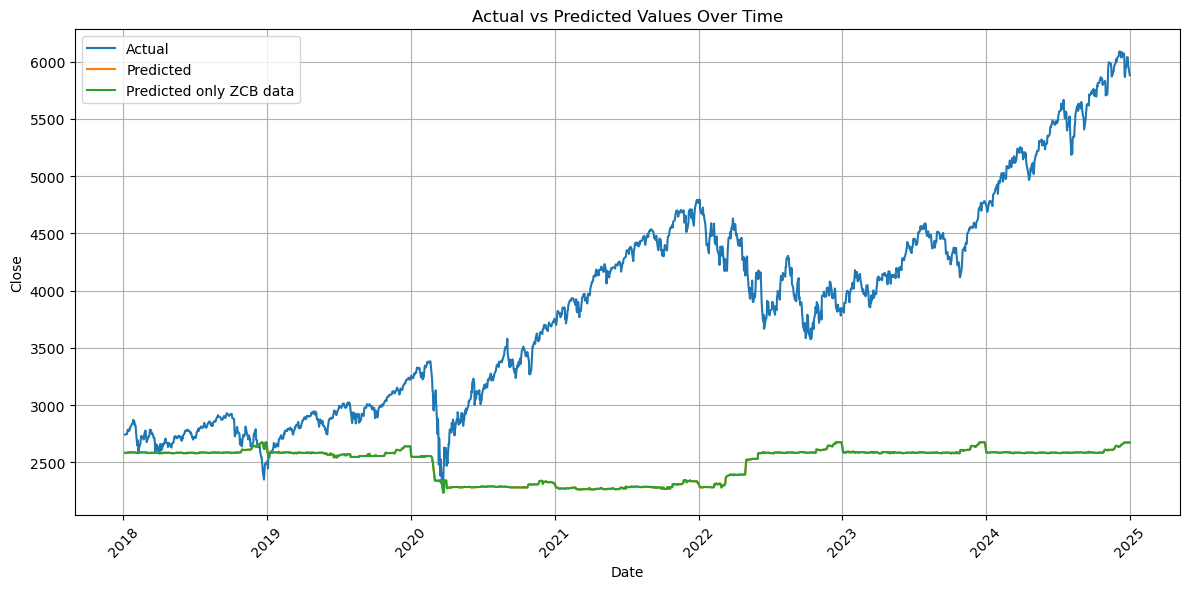

In [159]:
import matplotlib.pyplot as plt

dates = val_df.loc[y_val.index, 'Date']

plt.figure(figsize=(12, 6))
plt.plot(dates, y_val, label='Actual')
plt.plot(dates, y_pred, label='Predicted')
plt.plot(dates, y_pred_ZCB, label='Predicted only ZCB data')
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Close')  # or your target variable name
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # rotate date labels for readability
plt.tight_layout()       # adjust layout to prevent cutoff
plt.show()


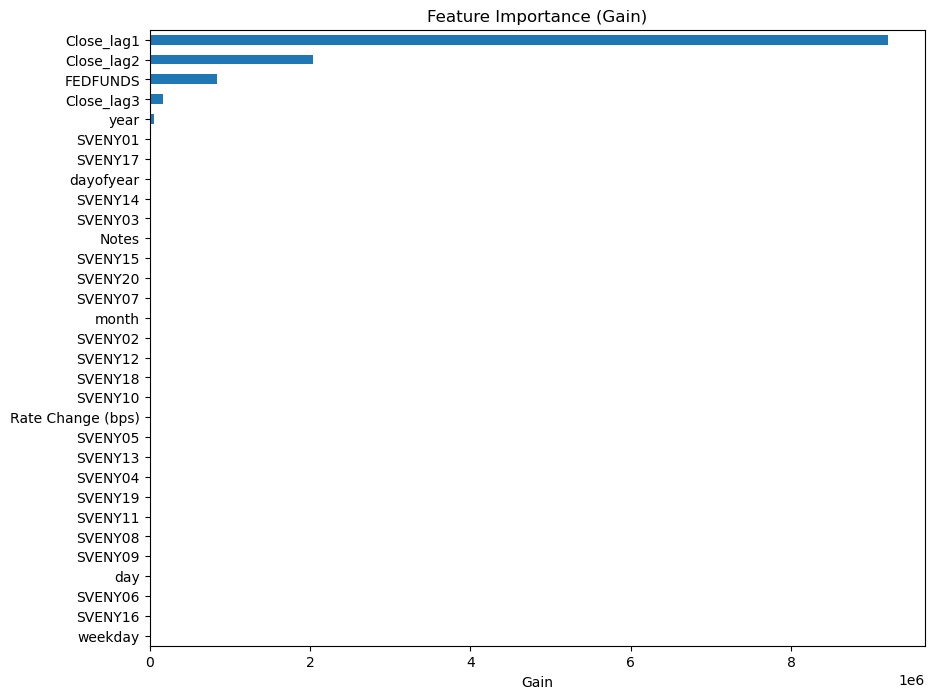

In [160]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Get feature importance scores by 'gain'
importance = xgb_model.get_score(importance_type='gain')

# Convert to pandas Series for easier plotting and sorting
import pandas as pd
importance_series = pd.Series(importance).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
importance_series.plot(kind='barh')
plt.xlabel('Gain')
plt.title('Feature Importance (Gain)')
plt.show()

### Predicting with XGboost

In [369]:
import pandas as pd

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define the cutoff dates
train_end = pd.Timestamp('2018-01-01')
val_end = pd.Timestamp('2025-01-01')

# Create the splits
train_df = df[df['Date'] < train_end]
val_df = df[(df['Date'] >= train_end) & (df['Date'] < val_end)]
test_df = df[df['Date'] >= val_end]

# Optionally check the sizes
print(f"Train set: {len(train_df)} rows")
print(f"Validation set: {len(val_df)} rows")
print(f"Test set: {len(test_df)} rows")

Train set: 6722 rows
Validation set: 1748 rows
Test set: 88 rows


#### Predicting with stock data

In [298]:
X_train

,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,SVENY10,...,SVENY15,SVENY16,SVENY17,SVENY18,SVENY19,SVENY20,High,Low,Open,Volume
1570,6.841287,7.133531,7.389677,7.613145,7.807043,7.974199,8.117182,8.238325,8.339752,8.423388,...,8.630695,8.639228,8.639320,8.631860,8.617656,8.597437,320.730011,310.929993,314.899994,1.911000e+08
1571,6.799324,7.089104,7.339749,7.555624,7.740626,7.898230,8.031535,8.143304,8.236000,8.311815,...,8.499001,8.507794,8.509597,8.505267,8.495562,8.481158,314.769989,311.510010,311.510010,1.245100e+08
1572,6.773037,7.085764,7.351627,7.576813,7.766714,7.926027,8.058841,8.168714,8.258740,8.331609,...,8.510314,8.519760,8.523138,8.521300,8.514983,8.504820,315.239990,313.589996,314.529999,1.230500e+08
1573,6.777678,7.110425,7.385916,7.613962,7.802602,7.958424,8.086828,8.192242,8.278296,8.347973,...,8.522859,8.533068,8.537293,8.536204,8.530366,8.520263,315.230011,309.350006,315.230011,1.208300e+08
1574,6.752939,7.099241,7.371627,7.591270,7.772313,7.924163,8.053062,8.163160,8.257241,8.337213,...,8.563365,8.578973,8.586105,8.585315,8.577150,8.562148,313.730011,311.839996,312.489990,1.100000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9387,0.117900,0.121300,0.186500,0.285700,0.400900,0.520500,0.637700,0.748600,0.851100,0.944700,...,1.291600,1.342300,1.388500,1.431000,1.470500,1.507400,3703.820068,3689.320068,3694.030029,1.883780e+09
9389,0.120300,0.121900,0.186500,0.285700,0.401200,0.521200,0.638800,0.750000,0.852600,0.946100,...,1.290900,1.341000,1.386800,1.428900,1.468100,1.504900,3740.510010,3723.030029,3723.030029,3.535460e+09
9390,0.118600,0.122100,0.187200,0.286400,0.401900,0.522300,0.640500,0.752400,0.856000,0.950600,...,1.299800,1.350500,1.396600,1.439000,1.478300,1.515100,3756.120117,3723.310059,3750.010010,3.393290e+09
9391,0.124200,0.120500,0.182100,0.279800,0.394700,0.514800,0.632700,0.744400,0.847700,0.941900,...,1.289400,1.339800,1.385800,1.428100,1.467300,1.504000,3744.629883,3730.209961,3736.189941,3.154850e+09


In [370]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

target = 'Close'

# Start timer
start = time.time()

# Drop rows with any missing values from train and test
train_data_clean = train_df.dropna()
val_data_clean = val_df.dropna()

# Prepare features and target again after dropping NA rows
X_train = train_data_clean.drop(columns=[target, 'Date'])
y_train = train_data_clean[target]

X_val = val_data_clean.drop(columns=[target, 'Date'])
y_val = val_data_clean[target]

# Now create DMatrices for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_val, label=y_val)


# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]

# Train model with early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(y_val, y_pred)
relative_mae = mae / abs(y_val).mean()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")



Mean Absolute Error: 1292.4242
Relative MAE: 0.3357
Time used by XGBoost: 297.2 ms


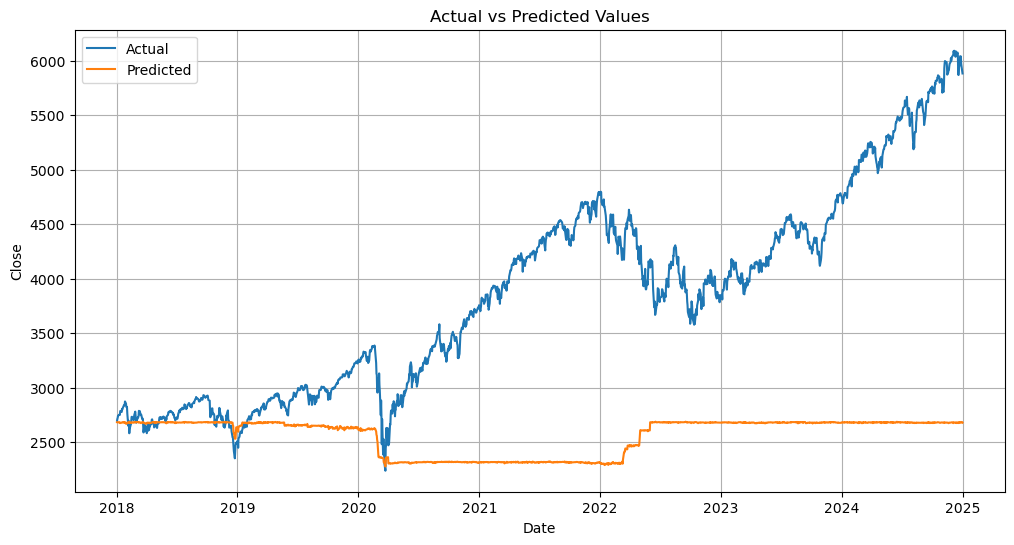

In [371]:
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred

# Make predictions
y_pred = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(val_data_clean['Date'], y_val, label='Actual')
plt.plot(val_data_clean['Date'], y_pred, label='Predicted')

plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


#### Predicting without stock data

In [282]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

# Drop rows with any missing values from train and test first
train_data_clean = train_df.dropna()
val_data_clean = val_df.dropna()

# Define columns to drop including target, date, and Open/High/Low
cols_to_drop = [target, 'Date', 'Open', 'High', 'Low', 'Volume']

# Prepare features and target after dropping NA rows
X_train = train_data_clean.drop(columns=cols_to_drop)
y_train = train_data_clean[target]

X_val = val_data_clean.drop(columns=cols_to_drop)
y_val = val_data_clean[target]

# Start timer
start = time.time()

# Create DMatrices for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_val, label=y_val)

# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]

# Train model with early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred_ZCB = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(y_val, y_pred_ZCB)
relative_mae = mae / abs(y_val).mean()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")




Mean Absolute Error: 1762.2281
Relative MAE: 0.4297
Time used by XGBoost: 124.6 ms


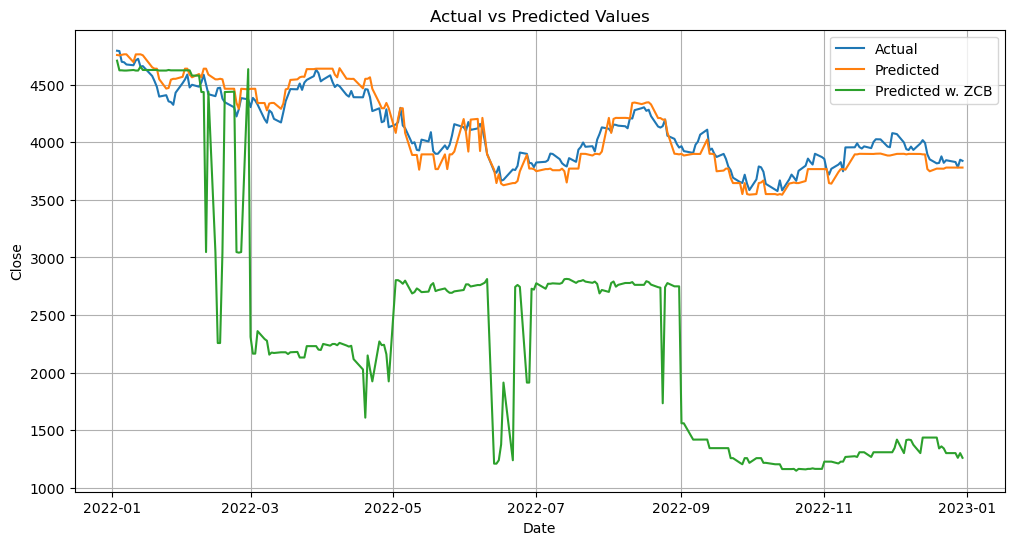

In [283]:
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred

# Make predictions
y_pred_ZCB = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(val_data_clean['Date'], y_val, label='Actual')
plt.plot(val_data_clean['Date'], y_pred, label='Predicted')
plt.plot(val_data_clean['Date'], y_pred_ZCB, label='Predicted w. ZCB')
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


#### Predicting only stock data

In [284]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

# Drop rows with any missing values from train and test first
train_data_clean = train_df.dropna()
val_data_clean = val_df.dropna()

# Select only Open, High, Low as features
feature_cols = ['Open', 'High', 'Low', 'Volume']

# Prepare features and target after drop,ping NA rows
X_train = train_data_clean[feature_cols]
y_train = train_data_clean[target]

X_val = val_data_clean[feature_cols]
y_val = val_data_clean[target]

# Start timer
start = time.time()

# Create DMatrices for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_val, label=y_val)

# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]

# Train model with early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred_stock = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(y_val, y_pred_stock)
relative_mae = mae / abs(y_val).mean()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")




Mean Absolute Error: 44.7109
Relative MAE: 0.0109
Time used by XGBoost: 50.9 ms


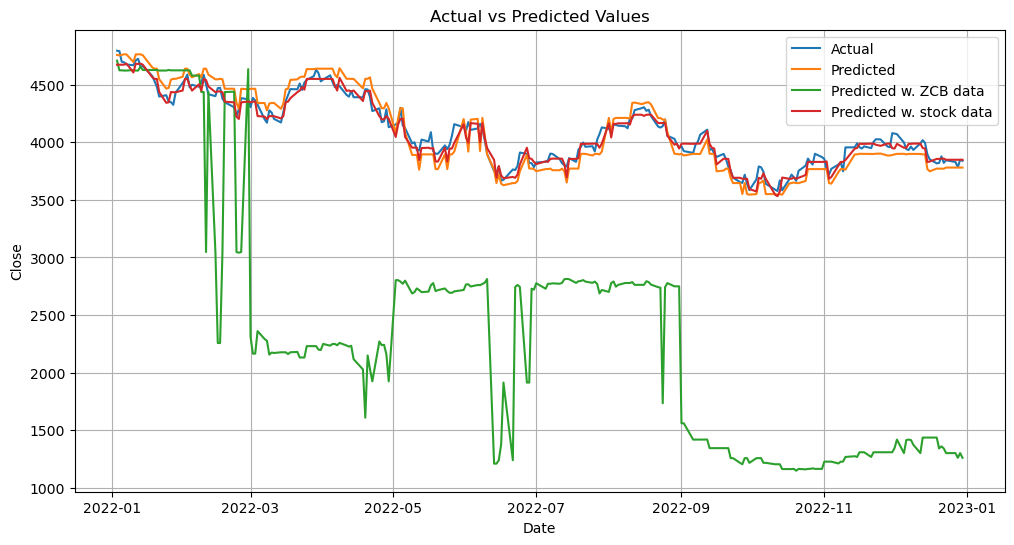

In [285]:
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred

# Make predictions
y_pred_stock = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(val_data_clean['Date'], y_val, label='Actual')
plt.plot(val_data_clean['Date'], y_pred, label='Predicted')
plt.plot(val_data_clean['Date'], y_pred_ZCB, label='Predicted w. ZCB data')
plt.plot(val_data_clean['Date'], y_pred_stock, label='Predicted w. stock data')
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


#### Predicting interest rate
Based on stock data, FED meetings and not time series 

In [43]:
print(data_w_SP.head(10))
print("Column names:", data_w_SP.columns.tolist())

           Date   SVENY01   SVENY02   SVENY03   SVENY04   SVENY05   SVENY06  \
1570 1991-01-09  6.841287  7.133531  7.389677  7.613145  7.807043  7.974199   
1571 1991-01-10  6.799324  7.089104  7.339749  7.555624  7.740626  7.898230   
1572 1991-01-11  6.773037  7.085764  7.351627  7.576813  7.766714  7.926027   
1573 1991-01-14  6.777678  7.110425  7.385916  7.613962  7.802602  7.958424   
1574 1991-01-15  6.752939  7.099241  7.371627  7.591270  7.772313  7.924163   
1575 1991-01-16  6.792056  7.156312  7.421302  7.627785  7.798035  7.943830   
1576 1991-01-17  6.808985  7.122995  7.347866  7.526553  7.673935  7.796870   
1577 1991-01-18  6.791290  7.085986  7.307488  7.493435  7.651070  7.784046   
1578 1991-01-21       NaN       NaN       NaN       NaN       NaN       NaN   
1579 1991-01-22  6.728230  7.063404  7.309689  7.507740  7.671806  7.808864   

       SVENY07   SVENY08   SVENY09  ...   SVENY17   SVENY18   SVENY19  \
1570  8.117182  8.238325  8.339752  ...  8.639320  8.6318

In [74]:
split_date = pd.Timestamp('2025-01-01')

train_data = data_w_SP[data_w_SP['Date'] < split_date]
test_data = data_w_SP[data_w_SP['Date'] >= split_date]

target = 'FEDFUNDS'

In [76]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

# Drop rows with any missing values from train and test first
train_data_clean = train_data.dropna()
test_data_clean = test_data.dropna()

# Select all except target
feature_cols = [col for col in data_w_SP.columns if col not in [target, "Date"]]


# Prepare features and target after drop,ping NA rows
X_train = train_data_clean[feature_cols]
Y_train = train_data_clean[target]

X_test = test_data_clean[feature_cols]
Y_test = test_data_clean[target]

# Start timer
start = time.time()

# Create DMatrices for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)

# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]

# Train model with early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred_rate = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(Y_test, y_pred_rate)
relative_mae = mae / abs(Y_test).mean()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")

Mean Absolute Error: 0.1253
Relative MAE: 0.0289
Time used by XGBoost: 2673.3 ms


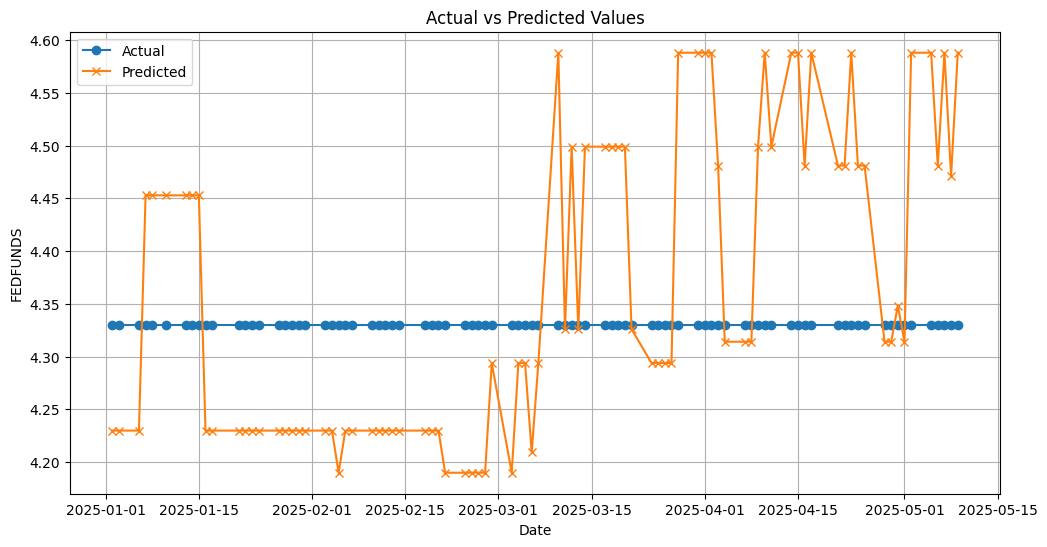

In [77]:
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred

# Make predictions
y_pred_rate = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test_data_clean['Date'], Y_test, label='Actual', marker='o')
plt.plot(test_data_clean['Date'], y_pred_rate, label='Predicted', marker='x')
#plt.plot(test_data_clean['Date'], y_pred_ZCB, label='Predicted w. ZCB data', marker='x')
#plt.plot(test_data_clean['Date'], y_pred_stock, label='Predicted w. stock data', marker='x')
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


#### Predict interest rate w lags

In [78]:
# Example: use data before a date for training, after that date for testing

split_date = pd.Timestamp('2025-01-01')

train_data = data_w_SP[data_w_SP['Date'] < split_date]
test_data = data_w_SP[data_w_SP['Date'] >= split_date]

target = 'FEDFUNDS'



In [79]:
def create_lags(df, target_col, lags=[1,2,3]):
    df = df.copy()
    for lag in lags:
        df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)
    return df

train_data = create_lags(train_data, target)
test_data = create_lags(test_data, target)

# Drop NA rows caused by shifting lags
train_data = train_data.dropna()
test_data = test_data.dropna()

X_train = train_data.drop(columns=[target, 'Date'])
Y_train = train_data[target]
X_test = test_data.drop(columns=[target, 'Date'])
Y_test = test_data[target]

In [80]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time

start = time.time()

dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)

params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

y_pred_rate_time = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(Y_test, y_pred_rate_time)

mean_abs_actual = abs(Y_test).mean()
relative_mae = mae / mean_abs_actual

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")


Mean Absolute Error: 0.0024
Relative MAE: 0.0005
Time used by XGBoost: 3459.5 ms


ValueError: x and y must have same first dimension, but have shapes (86,) and (88,)

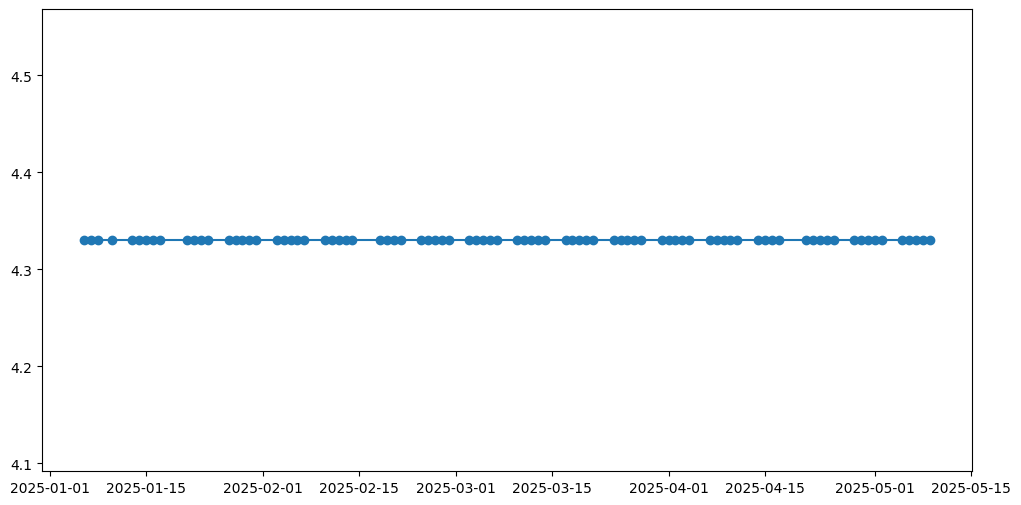

In [83]:
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test_data['Date'], Y_test, label='Actual', marker='o')
#plt.plot(test_data['Date'], y_pred_rate, label='Predicted', marker='x')
plt.plot(test_data['Date'], y_pred_rate_time, label='Predicted w. lags', marker='x')
#plt.plot(test_data_clean['Date'], y_pred_stock, label='Predicted w. stock data', marker='x')
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


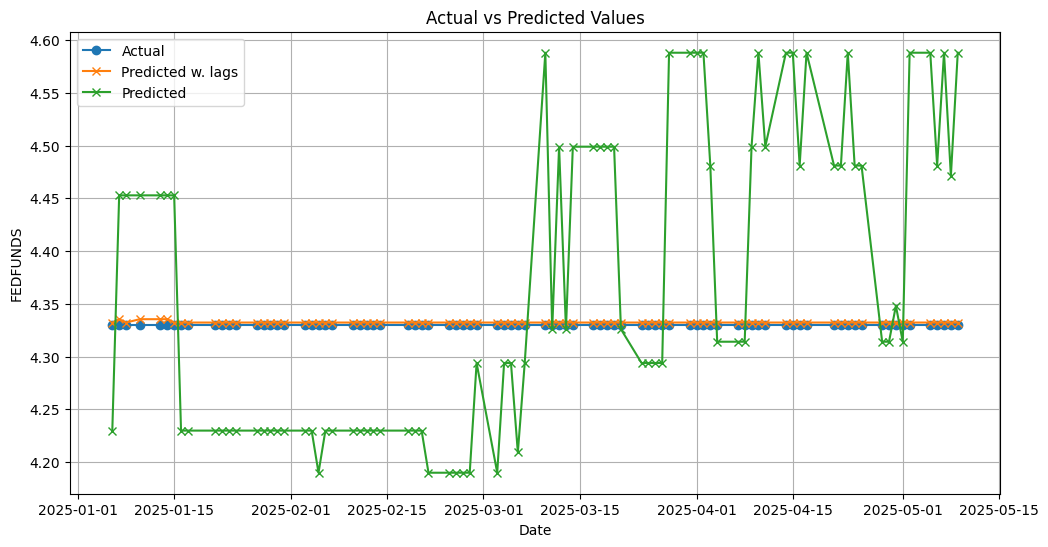

In [84]:
plt.figure(figsize=(12, 6))

# Actual
plt.plot(test_data['Date'], Y_test, label='Actual', marker='o')

# Predicted w. lags
plt.plot(test_data['Date'], y_pred_rate_time, label='Predicted w. lags', marker='x')

# Optional: trim y_pred_rate if needed
plt.plot(test_data['Date'], y_pred_rate[-len(test_data):], label='Predicted', marker='x')

plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


#### Predicting longer interest rates
Testset=2024

In [85]:
split_date = pd.Timestamp('2024-01-01')

train_data = data_w_SP[data_w_SP['Date'] < split_date]
test_data = data_w_SP[data_w_SP['Date'] >= split_date]

target = 'FEDFUNDS'

Mean Absolute Error: 0.2285
Relative MAE: 0.0463
Time used by XGBoost: 3580.9 ms


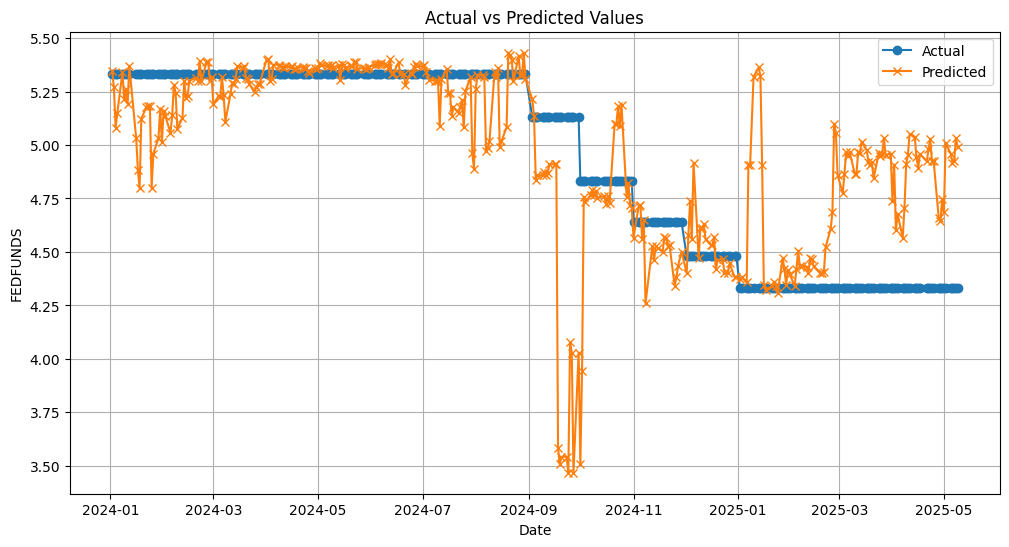

In [86]:

import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

# Drop rows with any missing values from train and test first
train_data_clean = train_data.dropna()
test_data_clean = test_data.dropna()

# Select all except target
feature_cols = [col for col in data_w_SP.columns if col not in [target, "Date"]]


# Prepare features and target after drop,ping NA rows
X_train = train_data_clean[feature_cols]
Y_train = train_data_clean[target]

X_test = test_data_clean[feature_cols]
Y_test = test_data_clean[target]

# Start timer
start = time.time()

# Create DMatrices for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)

# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]

# Train model with early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred_rate = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(Y_test, y_pred_rate)
relative_mae = mae / abs(Y_test).mean()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred

# Make predictions
y_pred_rate = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test_data_clean['Date'], Y_test, label='Actual', marker='o')
plt.plot(test_data_clean['Date'], y_pred_rate, label='Predicted', marker='x')
#plt.plot(test_data_clean['Date'], y_pred_ZCB, label='Predicted w. ZCB data', marker='x')
#plt.plot(test_data_clean['Date'], y_pred_stock, label='Predicted w. stock data', marker='x')
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


#### Predicting using a time window

In [372]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Configuration
target = 'Close'
start_train_year = 2005
end_val_year = 2024  # inclusive

# Ensure data is sorted
df = df.sort_values('Date').copy()
df['year'] = df['Date'].dt.year

# Store results
results = []

for val_year in range(start_train_year + 1, end_val_year + 1):
    print(f"\n🔁 Training up to {val_year - 1}, validating on {val_year}")

    # Train: all years up to (not including) val_year
    train_data = df[df['year'] < val_year]
    val_data = df[df['year'] == val_year]

    # Drop if validation is empty
    if val_data.empty:
        print(f"⚠️ No validation data for {val_year}")
        continue

    # Define X/y
    X_train = train_data.drop(columns=[target, 'Date', 'year'])
    y_train = train_data[target]
    X_val = val_data.drop(columns=[target, 'Date', 'year'])
    y_val = val_data[target]

    # Train model
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_val, label=y_val)

    params = {
        'booster': 'gbtree',
        'objective': 'reg:squarederror',
        'eval_metric': 'mae',
        'verbosity': 0
    }

    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=1000,
        evals=[(dtrain, 'train'), (dvalid, 'val')],
        early_stopping_rounds=20,
        verbose_eval=False
    )

    # Predict
    y_pred = model.predict(dvalid, iteration_range=(0, model.best_iteration + 1))

    # Evaluate
    mae = mean_absolute_error(y_val, y_pred)
    rel_mae = mae / abs(y_val.mean())
    results.append({
        'Validation Year': val_year,
        'MAE': mae,
        'Relative MAE': rel_mae
    })
    print(f"✅ MAE: {mae:.4f}, Relative MAE: {rel_mae:.4f}")

# Convert to DataFrame
cv_results = pd.DataFrame(results)
print("\n📊 Cross-Validation Summary:")
print(cv_results)



🔁 Training up to 2005, validating on 2006
✅ MAE: 6.6739, Relative MAE: 0.0051

🔁 Training up to 2006, validating on 2007
✅ MAE: 12.9979, Relative MAE: 0.0088

🔁 Training up to 2007, validating on 2008
✅ MAE: 10.8117, Relative MAE: 0.0088

🔁 Training up to 2008, validating on 2009
✅ MAE: 7.2828, Relative MAE: 0.0077

🔁 Training up to 2009, validating on 2010
✅ MAE: 7.5074, Relative MAE: 0.0066

🔁 Training up to 2010, validating on 2011
✅ MAE: 12.9215, Relative MAE: 0.0102

🔁 Training up to 2011, validating on 2012
✅ MAE: 5.6348, Relative MAE: 0.0041

🔁 Training up to 2012, validating on 2013
✅ MAE: 119.2815, Relative MAE: 0.0726

🔁 Training up to 2013, validating on 2014
✅ MAE: 119.8107, Relative MAE: 0.0620

🔁 Training up to 2014, validating on 2015
✅ MAE: 29.5133, Relative MAE: 0.0143

🔁 Training up to 2015, validating on 2016
✅ MAE: 39.4446, Relative MAE: 0.0188

🔁 Training up to 2016, validating on 2017
✅ MAE: 238.1599, Relative MAE: 0.0972

🔁 Training up to 2017, validating on 201

In [373]:
# Print as a nice table
print("\n📊 Cross-Validation Summary (sorted by year):")
print(cv_results.to_string(index=False))



📊 Cross-Validation Summary (sorted by year):
 Validation Year        MAE  Relative MAE
            2006   6.673918      0.005093
            2007  12.997901      0.008800
            2008  10.811740      0.008837
            2009   7.282839      0.007691
            2010   7.507383      0.006588
            2011  12.921546      0.010191
            2012   5.634759      0.004086
            2013 119.281513      0.072599
            2014 119.810708      0.062040
            2015  29.513303      0.014319
            2016  39.444598      0.018836
            2017 238.159892      0.097226
            2018  94.853576      0.034546
            2019  73.860869      0.025360
            2020 311.644307      0.096929
            2021 596.718559      0.139697
            2022  87.818681      0.021415
            2023  23.753598      0.005545
            2024 695.917742      0.128298


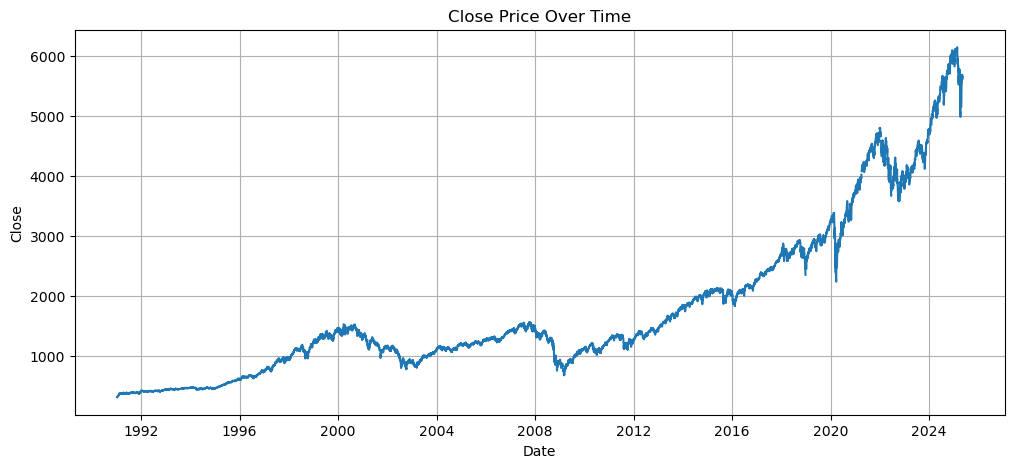

In [338]:
plt.figure(figsize=(12, 5))
plt.plot(data_w_SP['Date'], data_w_SP['Close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.show()


## Classification model for rente udbetalinger - meget skewed

### Data loading and filtering

In [71]:
import pandas as pd
data = pd.read_csv('../Final-Project-AppML/feds200628.csv', skiprows=9)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter rows where Date is on or after 1985-01-02
data1 = data[data['Date'] >= '1985-01-02']

# List of columns to keep always
cols_to_keep = ['Date', 'BETA0', 'BETA1', 'BETA2']

# Select columns that start with 'SVENY'
sveny_cols = [col for col in data.columns if col.startswith('SVENY')]

# Combine all columns to keep
all_keep_cols = cols_to_keep + sveny_cols

# Filter the dataframe to keep only these columns
data2 = data1[all_keep_cols]

# Drop SVENY21 to SVENY30 from data2
columns_to_drop = [f'SVENY{i}' for i in range(21, 31)]
data2 = data2.drop(columns=columns_to_drop, errors='ignore')

# Skip the first two rows, but manually set row 2 (i.e. 0-based row index 2) as header
SP_500_historic = pd.read_csv('../Final-Project-AppML/SP_historic.csv', skiprows=2, header=0)

# Now 'Date' should be in ISO format already, so you can parse it without specifying a format
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])

# If you want it as 'YYYY-MM-DD' string format
SP_500_historic['Date'] = SP_500_historic['Date'].dt.strftime('%Y-%m-%d')

# Preview
SP_500_historic.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Skip the first 9 rows
fed_interest = pd.read_csv('../Final-Project-AppML/FED_interest.csv')

# Ensure both Date columns are datetime
data2['Date'] = pd.to_datetime(data2['Date'])
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])
fed_interest['Date'] = pd.to_datetime(fed_interest['Date'])

# Now do the merge
data_w_SP = pd.merge(data2, SP_500_historic, on='Date', how='left')

data_w_SP = pd.merge(data_w_SP, fed_interest, on='Date', how='left')

# Ensure 'Date' is in datetime format
data_w_SP['Date'] = pd.to_datetime(data_w_SP['Date'])

# Filter by date
data_w_SP = data_w_SP[data_w_SP['Date'] >= '1991-01-09']

# Drop BETA columns and 'Target Rate (%)' column
data_w_SP = data_w_SP.loc[:, ~data_w_SP.columns.str.startswith('BETA')]
data_w_SP = data_w_SP.drop(columns='Target Rate (%)', errors='ignore')
#data_w_SP = data_w_SP.drop(columns='Notes', errors='ignore') # Forlæng
#data_w_SP = data_w_SP.drop(columns='Rate Change (bps)', errors='ignore') #Forlæng

# Convert 'Notes' and 'Rate Change (bps)' to integers, if they exist
for col in ['Notes', 'Rate Change (bps)']:
    if col in data_w_SP.columns:
        data_w_SP[col] = pd.to_numeric(data_w_SP[col], errors='coerce').astype('Int64')  # Nullable integer type

In [72]:
df = data_w_SP.dropna()

In [77]:
df.loc[:, 'Rate Change (bps)'] = (df['Rate Change (bps)'] != 0).astype(int)


### Splitting the data

In [78]:
df.head(5)

,Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY19,SVENY20,Close,High,Low,Open,Volume,FEDFUNDS,Notes,Rate Change (bps)
1570,1991-01-09,6.841287,7.133531,7.389677,7.613145,7.807043,7.974199,8.117182,8.238325,8.339752,...,8.617656,8.597437,311.489990,320.730011,310.929993,314.899994,191100000.0,6.91,0,1
1571,1991-01-10,6.799324,7.089104,7.339749,7.555624,7.740626,7.898230,8.031535,8.143304,8.236000,...,8.495562,8.481158,314.529999,314.769989,311.510010,311.510010,124510000.0,6.91,0,0
1572,1991-01-11,6.773037,7.085764,7.351627,7.576813,7.766714,7.926027,8.058841,8.168714,8.258740,...,8.514983,8.504820,315.230011,315.239990,313.589996,314.529999,123050000.0,6.91,0,0
1573,1991-01-14,6.777678,7.110425,7.385916,7.613962,7.802602,7.958424,8.086828,8.192242,8.278296,...,8.530366,8.520263,312.489990,315.230011,309.350006,315.230011,120830000.0,6.91,0,0
1574,1991-01-15,6.752939,7.099241,7.371627,7.591270,7.772313,7.924163,8.053062,8.163160,8.257241,...,8.577150,8.562148,313.730011,313.730011,311.839996,312.489990,110000000.0,6.91,0,0


In [79]:
import pandas as pd

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define the cutoff dates
train_end = pd.Timestamp('2018-01-01')
val_end = pd.Timestamp('2025-01-01')

# Create the splits
train_df = df[df['Date'] < train_end]
val_df = df[(df['Date'] >= train_end) & (df['Date'] < val_end)]
test_df = df[df['Date'] >= val_end]

# Optionally check the sizes
print(f"Train set: {len(train_df)} rows")
print(f"Validation set: {len(val_df)} rows")
print(f"Test set: {len(test_df)} rows")


Train set: 6722 rows
Validation set: 1748 rows
Test set: 88 rows


/var/folders/lj/7sv2y2pj44184gp5gwhj9d5w0000gn/T/ipykernel_73517/160201209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


### Fitting a xgboost model

In [92]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Define features and target
target = 'Rate Change (bps)'
features = [col for col in df.columns if col not in ['Date', target]]

# Encode target if it's categorical
if df[target].dtype == 'object':
    le = LabelEncoder()
    df[target] = le.fit_transform(df[target])

# Extract features and target for each split
X_train = train_df[features]
y_train = train_df[target]

X_val = val_df[features]
y_val = val_df[target]

X_test = test_df[features]
y_test = test_df[target]  # Not used for training/validation, just future evaluation


In [94]:
# Initialize model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Use 'multi:softprob' if multiclass
    eval_metric='auc',
    use_label_encoder=False,
)

# Fit model
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

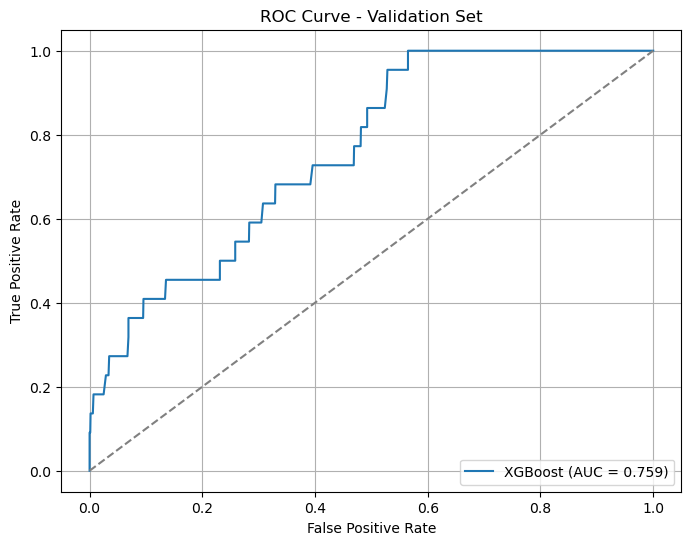

In [95]:
# Predict probabilities
val_probs = model.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, val_probs)
auc_score = roc_auc_score(y_val, val_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [98]:
# Predict probabilities for class 1
test_values = model.predict(X_test)

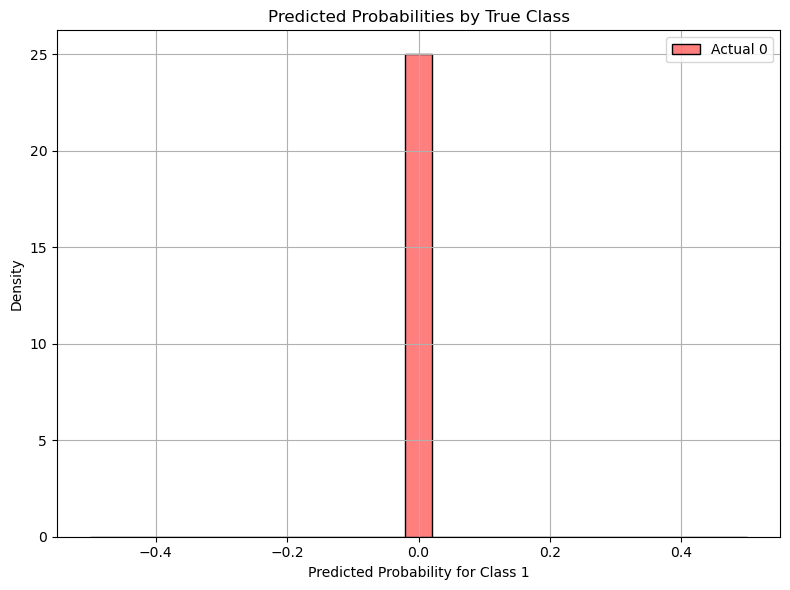

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot probability distribution by actual class
plt.figure(figsize=(8, 6))
sns.histplot(test_values[y_test == 0], color='red', label='Actual 0', stat='density', kde=True, bins=25)
sns.histplot(test_values[y_test == 1], color='green', label='Actual 1', stat='density', kde=True, bins=25)
plt.xlabel('Predicted Probability for Class 1')
plt.title('Predicted Probabilities by True Class')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


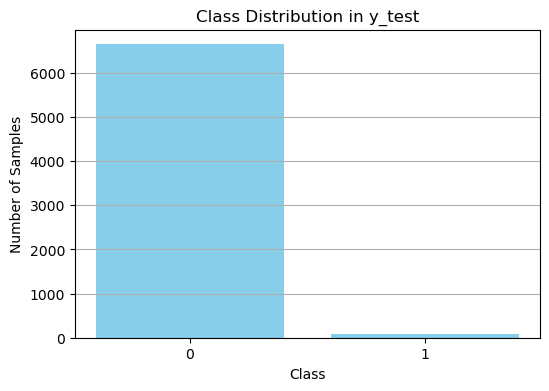

In [104]:
plt.figure(figsize=(6, 4))
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='skyblue')
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in y_test')
plt.grid(axis='y')
plt.show()


## Data loading with latent space numbers - not done

In [ ]:
import pandas as pd

# Skip the first 9 rows
latent_space = pd.read_csv('../Final-Project-AppML/latent_space.csv')

#SP_500['Date'] = pd.to_datetime(SP_500['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')

# Show the first 5 rows of the resulting dataframe
latent_space.head(5)

,latent_dim_1,latent_dim_2
0,-0.039638,-1.404462
1,-0.009008,1.542170
2,-0.018312,0.160683
3,-0.003717,-0.297078
4,-0.059667,-1.023101


In [ ]:
latent_space.shape

(9850, 2)